<hr style="height: 1px;">
<i>This notebook was authored by the 8.S50x Course Team, Copyright 2022 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Lesson 6: Confidence</h1>


<a name='section_6_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L6.0 Overview</h2>


<h3>Navigation</h3>

<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_6_1">L6.1 Introduction to Confidence Intervals</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_6_1">L6.1 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_6_2">L6.2 z-Scores and Confidence Intervals for Other Distributions</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_6_2">L6.2 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_6_3">L6.3 Another Example and Rules of Significance</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_6_3">L6.3 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_6_4">L6.4 Moments of Distributions and Mapping</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_6_4">L6.4 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_6_5">L6.5 Monte Carlo Integration</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_6_5">L6.5 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_6_6">L6.6 Returning to Fitting Supernova Data</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_6_6">L6.6 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_6_7">L6.7 Fitting with a More Accurate Model</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_6_7">L6.7 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_6_8">L6.8 Fit to Full Cosmological Model</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_6_8">L6.8 Exercises</a></td>
    </tr>
</table>



<h3>Learning Objectives</h3>

In this Lesson, we will spend some time further understanding uncertainty in more complicated scenarios, exploring the following objectives:


- How do we quote significance?
- Asymmetric distributions
- Moments of distributions
- Numerical Integration
- A more sophisticated fit
- What have we learned about the properties of the Universe

<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook.


In [ ]:
#>>>RUN: L6.0-runcell00a

!pip install lmfit

In [ ]:
#>>>RUN: L6.0-runcell00b

#importing data from git repository

!git init
!git remote add -f origin https://github.com/mitx-8s50/nb_LEARNER/
!git config core.sparseCheckout true
!echo 'data/L04' >> .git/info/sparse-checkout
!git pull origin main

In [1]:
#>>>RUN: L6.0-runcell01

import numpy as np                #https://numpy.org/doc/stable/
from scipy import stats           #https://docs.scipy.org/doc/scipy/reference/stats.html
from scipy import optimize as opt #https://docs.scipy.org/doc/scipy/reference/optimize.html
import matplotlib.pyplot as plt   #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
import math                       #https://docs.python.org/3/library/math.html
import csv                        #https://docs.python.org/3/library/csv.html
import lmfit                      #https://lmfit.github.io/lmfit-py/ 

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.

In [2]:
#>>>RUN: L6.0-runcell02

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title


<a name='section_6_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L6.1 Introduction to Confidence Intervals</h2>  

| [Top](#section_6_0) | [Previous Section](#section_6_0) | [Exercises](#exercises_6_1) | [Next Section](#section_6_2) |


In [ ]:
#>>>RUN: L6.1-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L06/slides_L06_01.html', width=970, height=550)

<h3>Overview</h3>

For the past few Lessons, we have been considering uncertainties that we have defined to be the variance of a distribution, but what exactly do they mean? Let's go back to the p-value definition, given a pdf $p\left(x|\theta\right)$

$$
\begin{eqnarray}
P(x|\theta,x\in \Delta) & = &  \int_{x}^{x+\Delta} p\left(x|\theta\right) dx \\
P_{right}(x|\theta, x\leq x_{0}) & = &  \int_{-\infty}^{x_{0}} p\left(x|\theta\right) dx
\end{eqnarray}
$$

The bottom integral is the cumulative distribution function (cdf), we can use this to derive relationships to the variances of distributions. Simply put, we can compute the probability within various intervals of a distribution.  For the normal (Gaussian) distribution variable $x$, we typically transform $x$ so that it can be written in terms of a normal distribution of unit $1$.


$$
\begin{equation}
\mathcal{N}(0,1) = \frac{x-\bar{x}}{\sigma}
\end{equation}
$$
The above shifts $x$ to be center about 0, and rescales the data so that the standard deviation is 1. 

Let's play around with a few things. First, let's compute the probability that an event falls 2 standard deviations outside of a gaussian distribution. We can do this by using the CDF for -2 and 2 standard deviations, and noting that the integral of a probability distribution is 1.  

In [3]:
#>>>RUN: L6.1-runcell01

#probability for events within 1 sigma
pM1=stats.norm.cdf(-1)
p1=stats.norm.cdf(1)
print("probability for events within 1 sigma: ", p1-pM1)
print()

#probability for events strictly < 1 sigma upper bound
pM1=stats.norm.cdf(-1)
p1=stats.norm.cdf(1)
print("probability for events strictly < 1 sigma upper bound: ", p1)
print()

#probability for events within 2 sigma
pM2=stats.norm.cdf(-2)
p2=stats.norm.cdf(2)
print("probability for events within 2 sigma: ", p2-pM2)
print()

#probability for events strictly > 2 sigma upper bound
pM2=stats.norm.cdf(-2)
p2=stats.norm.cdf(2)
print("probability for events strictly > 2 sigma upper bound: ", 1-p2)
print()

probability for events within 1 sigma:  0.6826894921370859

probability for events strictly < 1 sigma upper bound:  0.8413447460685429

probability for events within 2 sigma:  0.9544997361036416

probability for events strictly > 2 sigma upper bound:  0.02275013194817921



<a name='exercises_6_1'></a>     

| [Top](#section_6_0) | [Restart Section](#section_6_1) | [Next Section](#section_6_2) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-6.1.1</span>

Using stats.norm.cdf(), calculate the p value corresponding to $x$ being within $\pm 3\sigma$ of the mean in a normal distribution. Enter your answer as a number (not a percentage) with precision 1e-4.


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

#YOUR CODE HERE


In [ ]:
#>>>SOLUTION

from scipy import stats

#probability for events within 3 sigma
pM1=stats.norm.cdf(-3)
p1=stats.norm.cdf(3)
print("probability for events within 3 sigma: ", p3-pM3)
print()

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
0.9973002039367398
</pre>
        
**EXPLANATION:**
    
The probability is 99.7%.
    
</div>


>#### Follow-up 6.1.1a (ungraded)
>
>What is the delta log likelihood that corresponds to a 3 sigma deviation?

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-6.1.2</span>

When computing p-values, we often refer to the region of the distribution that we are working with as "left-handed" or "right-handed". For instance, if we wanted to know the probability of a left-handed $3\sigma$ deviation, this would be the area under the curve (the CDF) to the left of the lower $3\sigma$ bound.

What is the probability for a right-handed 5$\sigma$ deviation? What is the probability of ANY deviation greater than 5$\sigma$?

Enter your answer as a list of two numbers (not a percentage) times 1e-7, with precision 1e-3. For instance, an answer of `6.238572e-7` would be reported as `6.238`.
    
Your list should be `[p_right_handed_5sigma, p_any_5sigma]`.

In [ ]:
#>>>SOLUTION

from scipy import stats

#probability for events strictly > 5 sigma upper bound
pM5=stats.norm.cdf(-5)
p5=stats.norm.cdf(5)
print("probability for events strictly > 5 sigma upper bound: ", 1-p5)
print()


#probability for any events > 5 sigma
print("probability for any events > 5 sigma: ", 1-p5 + pM5)
print()

#check that 1-p5 + pM5 = 2*(1-p5)
print("check that 1-p5 + pM5 = 2*(1-p5): ", 2*(1-p5))
print()



<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
[2.8665e-7,5.7330e-7]
</pre>
        
**EXPLANATION:**
    
The probability for one side is just the integral of one end. The probability for both is just twice that of the one sided integral. This is because he normal distribution is symmetric. 
    
</div>


<a name='section_6_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L6.2 z-Scores and Confidence Intervals for Other Distributions</h2>  

| [Top](#section_6_0) | [Previous Section](#section_6_1) | [Exercises](#exercises_6_2) | [Next Section](#section_6_3) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.1x+3T2022/block-v1:MITxT+8.S50.1x+3T2022+type@sequential+block@seq_LS6/block-v1:MITxT+8.S50.1x+3T2022+type@vertical+block@vert_LS6_vid2" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

We often want to characterize our probability by something that is easier to speak about in terms of deviations. Because of the central limit theorem and everything essentially becoming a Gaussian distribution in the large $N$ limit, we tend to refer to prorbabilities in units of standard deviations ($\sigma$) of a normal distribution. A 1$\sigma$ deviation thus refers to a deviation that is within the x$\pm1\sigma$ of the mean for a gaussian distribution, or in other words with 1-68.2% = 31.8% probability that a fluctuation is larger than the observed fluctuation. 

To compute these probabilities, we can gain rely on the CDF distribution of the gaussian distribution. Let's compute the probabilities for 1 to 5 standard deviations.  


In [4]:
#>>>RUN: L6.2-runcell01

from scipy import stats

#Let's do some integrals
p50=stats.norm.cdf(0)
p1=stats.norm.cdf(1)
p2=stats.norm.cdf(2)
p3=stats.norm.cdf(3)
p5=stats.norm.cdf(5)
pM1=stats.norm.cdf(-1)
pM2=stats.norm.cdf(-2)
pM3=stats.norm.cdf(-3)
pM5=stats.norm.cdf(-5)
#print(p50,p1,p2,p3,pM1,pM2,pM3)

#Whats the probability of things fluctuation more that 1\sigma
print(p1-pM1,"within 1 standard deviations")
print(p2-pM2,"within 2 standard deviations")
print(p3-pM3,"within 3 standard deviations")
print(p5-pM5,"within 5 standard deviations")

#Sometimes we only consider 1-sided p-values
print((1.-p1),"to fluctuate above 1 standard deviation")
print((1.-p3),"to fluctuate above 3 standard deviation")
print((1.-p5),"to fluctuate above 5 standard deviation")

0.6826894921370859 within 1 standard deviations
0.9544997361036416 within 2 standard deviations
0.9973002039367398 within 3 standard deviations
0.9999994266968562 within 5 standard deviations
0.15865525393145707 to fluctuate above 1 standard deviation
0.0013498980316301035 to fluctuate above 3 standard deviation
2.866515719235352e-07 to fluctuate above 5 standard deviation


These probability values define what we call confidence intervals. We also often write these as z-scores. For a measurement, the z-score is the probability that a measurement is within $z$ standard deviations of a distribution. 

$$
\begin{equation}
\bar{x}\pm z \sigma
\end{equation}
$$

Z-scores are often considered in the context of Gaussian distributions with z-scores corresponding to 68%, 95%, and 99.75% for 1,2, and 3$\sigma$ deviations, respectively. However, for more complicated distributions, the approach is a bit different. 

<h3>Asymmetric distributions</h3>

In the discussion above, we considered the simplest scenario where we looked at the variation of distributions which we assumed were symmetrically distributed about zero. What if these distributions are asymmetric, how do we define the variations? Let's take a look at some asymmetric distributions. 

In the code below, we are going to use a few additional functions
`pdf`$\rightarrow$this computes teh pdf value, `ppf`$\rightarrow$ this goes the reverse direction of the cdf function by giving the input value (ie $\sigma$ value) for a specific probability. Let's do this for a $\chi^{2}$ distribution.

In [12]:
stats.norm.ppf(0.97)

1.8807936081512509

two tail values: 19.02276779864163 2.7003894999803584
one tail values: 16.918977604620448 3.3251128430668158


/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_43196/895963545.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


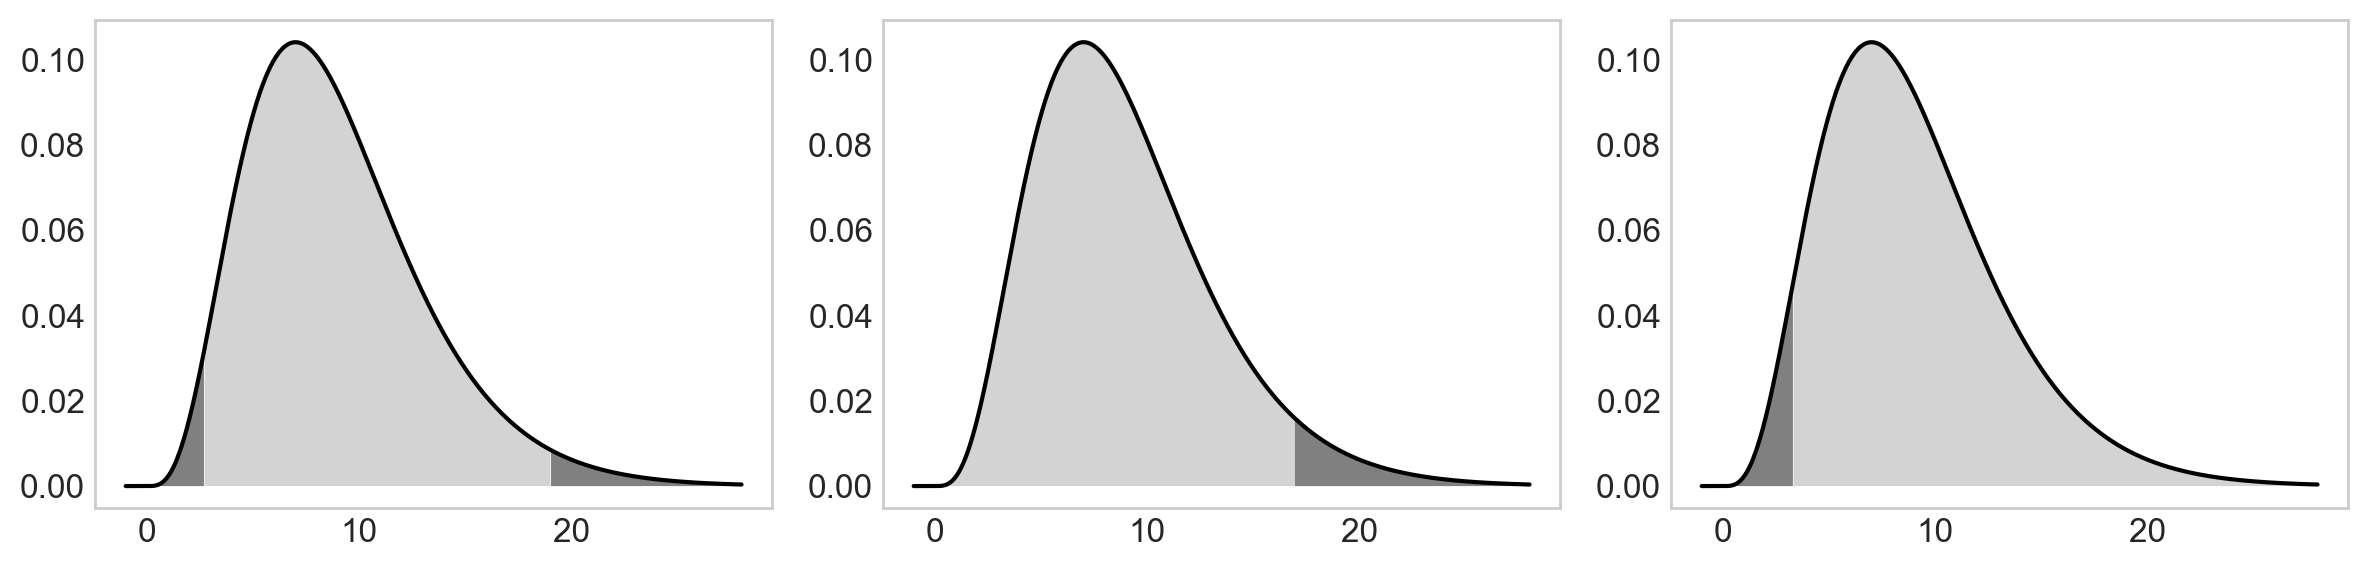

In [13]:
#>>>RUN: L6.2-runcell03

import numpy as np
import matplotlib.pyplot as plt
#code from here: https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers

#Let's plot a chi2 with 9 degrees of freedom (df)
df = 9 
x = np.linspace(-1, 28, 1000)
y = stats.chi2.pdf(x, df, loc=0, scale=1)



# two-tailed
#Note we will use this function percent point function(ppf), 
#which inverts the cdf and gives a z from a probability
two_right_tail = stats.chi2.ppf(1 - 0.025, df) #left value
two_left_tail  = stats.chi2.ppf(1 - 0.975, df) #right value
print("two tail values:",two_right_tail,two_left_tail)

# one tailed
one_right_tail = stats.chi2.ppf(1 - 0.05, df)
one_left_tail  = stats.chi2.ppf(1 - 0.95, df)
print("one tail values:",one_right_tail,one_left_tail)

plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for ax in axes:
    ax.plot(x, y, c='black')
    ax.grid(False)
    #ax.xaxis.set_major_formatter(plt.NullFormatter())
    #ax.yaxis.set_major_formatter(plt.NullFormatter())

#now let's fill this from the left
axes[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= two_left_tail), facecolor='grey')
axes[0].fill_between(x, 0, y, where=(np.array(x) > two_left_tail) & (np.array(x) < two_right_tail), facecolor='lightgrey')
axes[0].fill_between(x, 0, y, where=(np.array(x) > two_right_tail) & (np.array(x) <= max(x)), facecolor='grey')

axes[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) < one_right_tail), facecolor='lightgrey')
axes[1].fill_between(x, 0, y, where=(np.array(x) > one_right_tail) & (np.array(x) <= max(x)), facecolor='grey')

axes[2].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= one_left_tail), facecolor='grey')
axes[2].fill_between(x, 0, y, where=(np.array(x) > one_left_tail) & (np.array(x) <= max(x)), facecolor='lightgrey')

fig.tight_layout()

Now that we have taken a look a these distributions, we see a clear asymmetry in the lengths of the z-values to p-values of the left and right. What is conserved is the integrals, but the values are different. Let's go ahead and compute the mean and variance of these distributions. To do this, we will sample a distribution using some new functions, denoted `rvs` ("random variate samples"); this function allows us to sample specific distributions so that we are able to generate toy events off of these sampled events. 

[ 3.9315882   6.26310053 12.30403016  9.88503159  8.8358941 ]
Sampled Mean: 8.819306014711616 Sampled Stddev: 4.021167861217289


/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_43196/1697711248.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


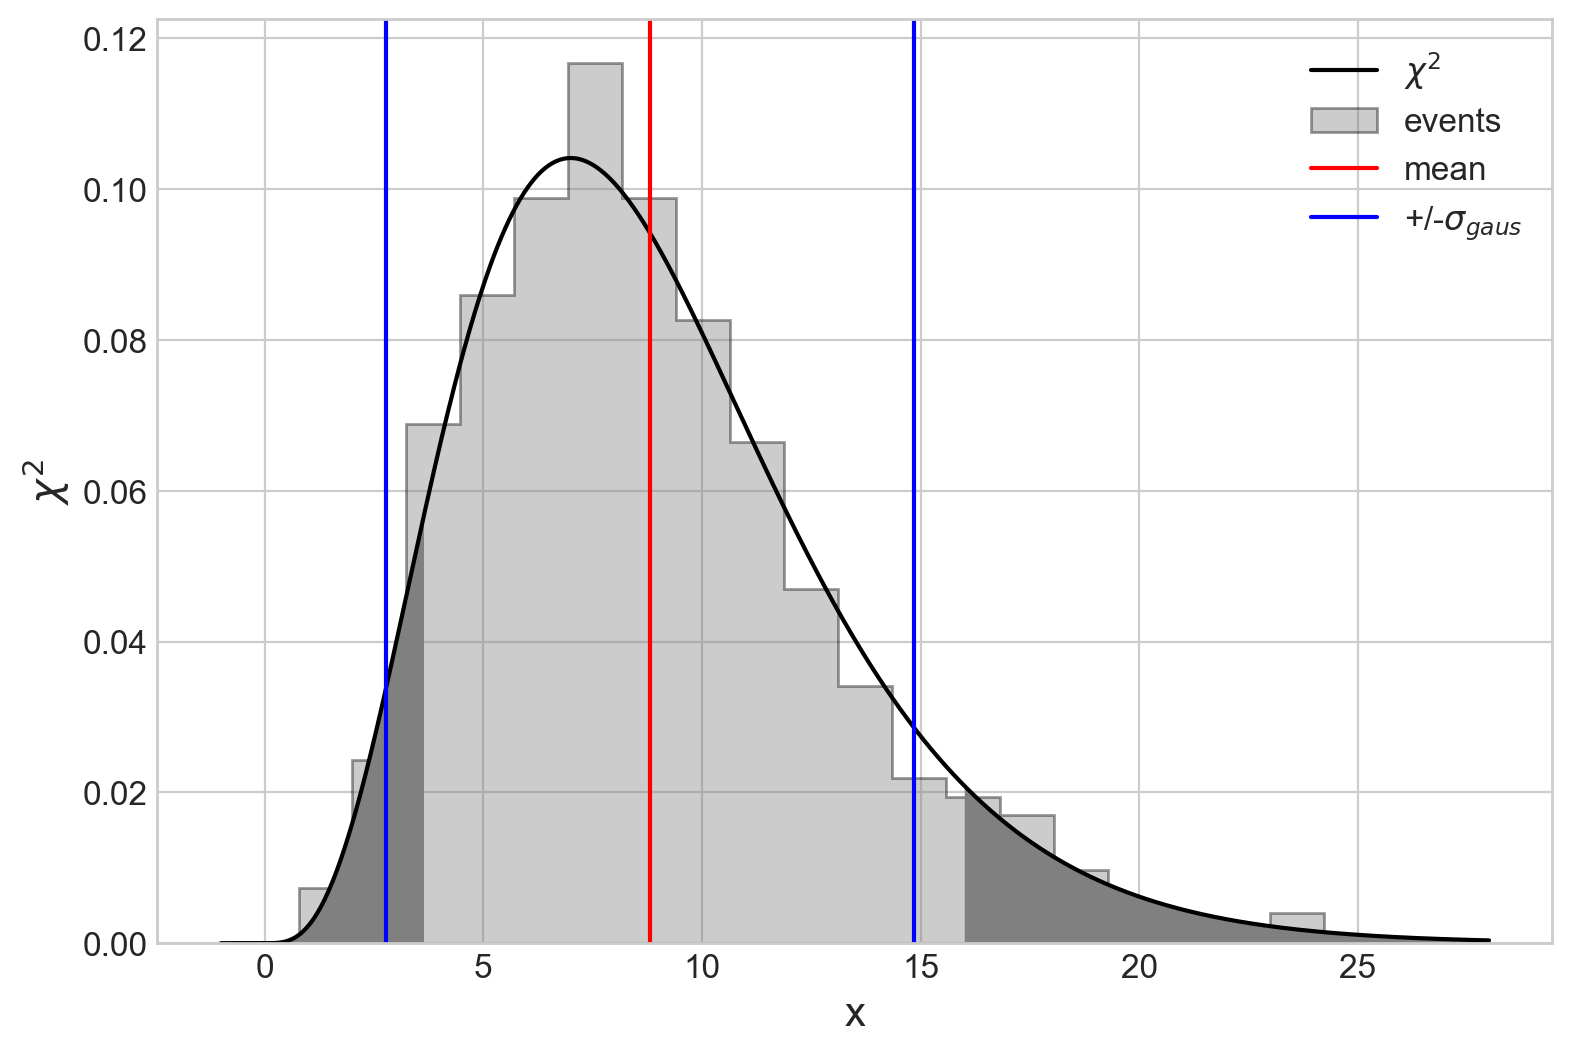

In [18]:
#>>>RUN: L6.2-runcell04

#Let's compute the mean and RMS of a sample from this distribution
df=9
#Let's sample this distribution
y_chi2 = stats.chi2.rvs(size=1000,df=df)
print(y_chi2[0:5]) #print some valued
print("Sampled Mean:",y_chi2.mean(),"Sampled Stddev:",y_chi2.std())

z=1.5 #Let's deviation corresponding to 1.5sigma in a Gauassian
x = np.linspace(-1, 28, 1000)
y = stats.chi2.pdf(x, df, loc=0, scale=1)
two_right_tail = stats.chi2.ppf(1 - stats.norm.cdf(-z), df)
two_left_tail = stats.chi2.ppf(1 - stats.norm.cdf(z), df)

def plotItAll(x,y,y_chi2,z):
    #Now let's plot the filled area using the true pdfs and the assumed variations if it were a Gaussian
    plt.style.use('seaborn-whitegrid')
    #plot distribution
    plt.plot(x, y, c='black',label="$\chi^2$")
    #plot chi2
    plt.hist(y_chi2, histtype='stepfilled', edgecolor='k', alpha=0.4, color='gray', density=True,bins=20,label="events")
    #true values
    plt.fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= two_left_tail), facecolor='grey')
    plt.fill_between(x, 0, y, where=(np.array(x) > two_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
    #Mean +/- 1 sigma
    plt.axvline(y_chi2.mean(), c='red',label="mean")
    plt.axvline(y_chi2.mean()+y_chi2.std()*z, c='blue',label="+/-$\sigma_{gaus}$")
    plt.axvline(y_chi2.mean()-y_chi2.std()*z, c='blue')
    plt.xlabel("x")
    plt.ylabel("$\chi^{2}$")
    plt.legend(loc='upper right')
    plt.show()
plotItAll(x,y,y_chi2,z)

What we see now is that if we take deviations characteristic of two standard deviations or greater on the left and right of the distribution (these are the dark gray distrbutions) and we compare them to expected variation that is up and down one standard deviation (the blue lines), we find that the p-values and the blue lines do not direct match to one another. This is because standard deviation for an asymmetric distribution does not reflect the true width well, since the distribution is asymmetric. 

<a name='exercises_6_2'></a>     

| [Top](#section_6_0) | [Restart Section](#section_6_2) | [Next Section](#section_6_3) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-6.2.1</span>

In the last section, we were using the language of "p-values" and standard deviations. Now we will talk about things in terms of "confidence" and "z-score". 

What is the confidence level corresponding to a z-score of 4, for a normal distribution? Enter your answer as a number with precision 1e-6.

In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

pass


In [ ]:
#>>>SOLUTION

pM4=stats.norm.cdf(-4)
p4=stats.norm.cdf(4)
print("confidence level for events within 4 sigma: ", p4-pM4)
print()


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
0.9999366
</pre>
        
**EXPLANATION:**
    
A z-score of 4 corresponds to a probability of 99.99366%.
    
</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-6.2.2</span>

Again, consider a normal distribution. What is the z-score for an event to be less than some value $x$, where we know the probability that the value is $>x$ is $p=0.40$?

Enter your answer as a number with precision 1e-3.

In [ ]:
#>>>SOLUTION

from scipy import stats

z4=stats.norm.ppf(0.6)
print("z-score is:",z4)


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
0.253
</pre>
        
**EXPLANATION:**
    
This involves just going from p-value to z-score with a normal distribution, noting that we are taking the right hand sign. 
    
</div>


<a name='section_6_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L6.3 Another Example and Rules of Significance</h2>  

| [Top](#section_6_0) | [Previous Section](#section_6_2) | [Exercises](#exercises_6_3) | [Next Section](#section_6_4) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.1x+3T2022/block-v1:MITxT+8.S50.1x+3T2022+type@sequential+block@seq_LS6/block-v1:MITxT+8.S50.1x+3T2022+type@vertical+block@vert_LS6_vid3" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

In [ ]:
#>>>RUN: L6.3-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L06/slides_L06_03.html', width=970, height=550)

<h3>Overview</h3>

Finally, let's consider a more complicated scenario where the shape of the distribution is very far away from a normal distribution. In this scenario, we want to show that convnetional estimates for the width of a distribution breakdown dramatically. Its important to know this, since it can be very easy to use standard deviation to characterize the properties of a distribution. 

Let's consider a Cauchy distribution (described <a href="https://en.wikipedia.org/wiki/Cauchy_distribution" target="_blank">here</a>) and given by the form:

$$
\begin{equation}
f(x;x_{0},\gamma) = \frac{1}{\pi \gamma} \left(\frac{1}{\left(x-x_0\right)^{2} + \gamma^{2}}\right)
\end{equation}
$$

This function is available also in scipy stats with ```scipy.stats.cauchy```. For this function we will compare the Gaussian 1 standard deviation with the true Cauchy p-values to see what the differences are. 

left/right-handed values corresponding to z-score: -13.967730199244553 13.967730199244508
[mean of cauchy data, stdev of cauchy data]: 1.9253138433065913 484.80421138166054


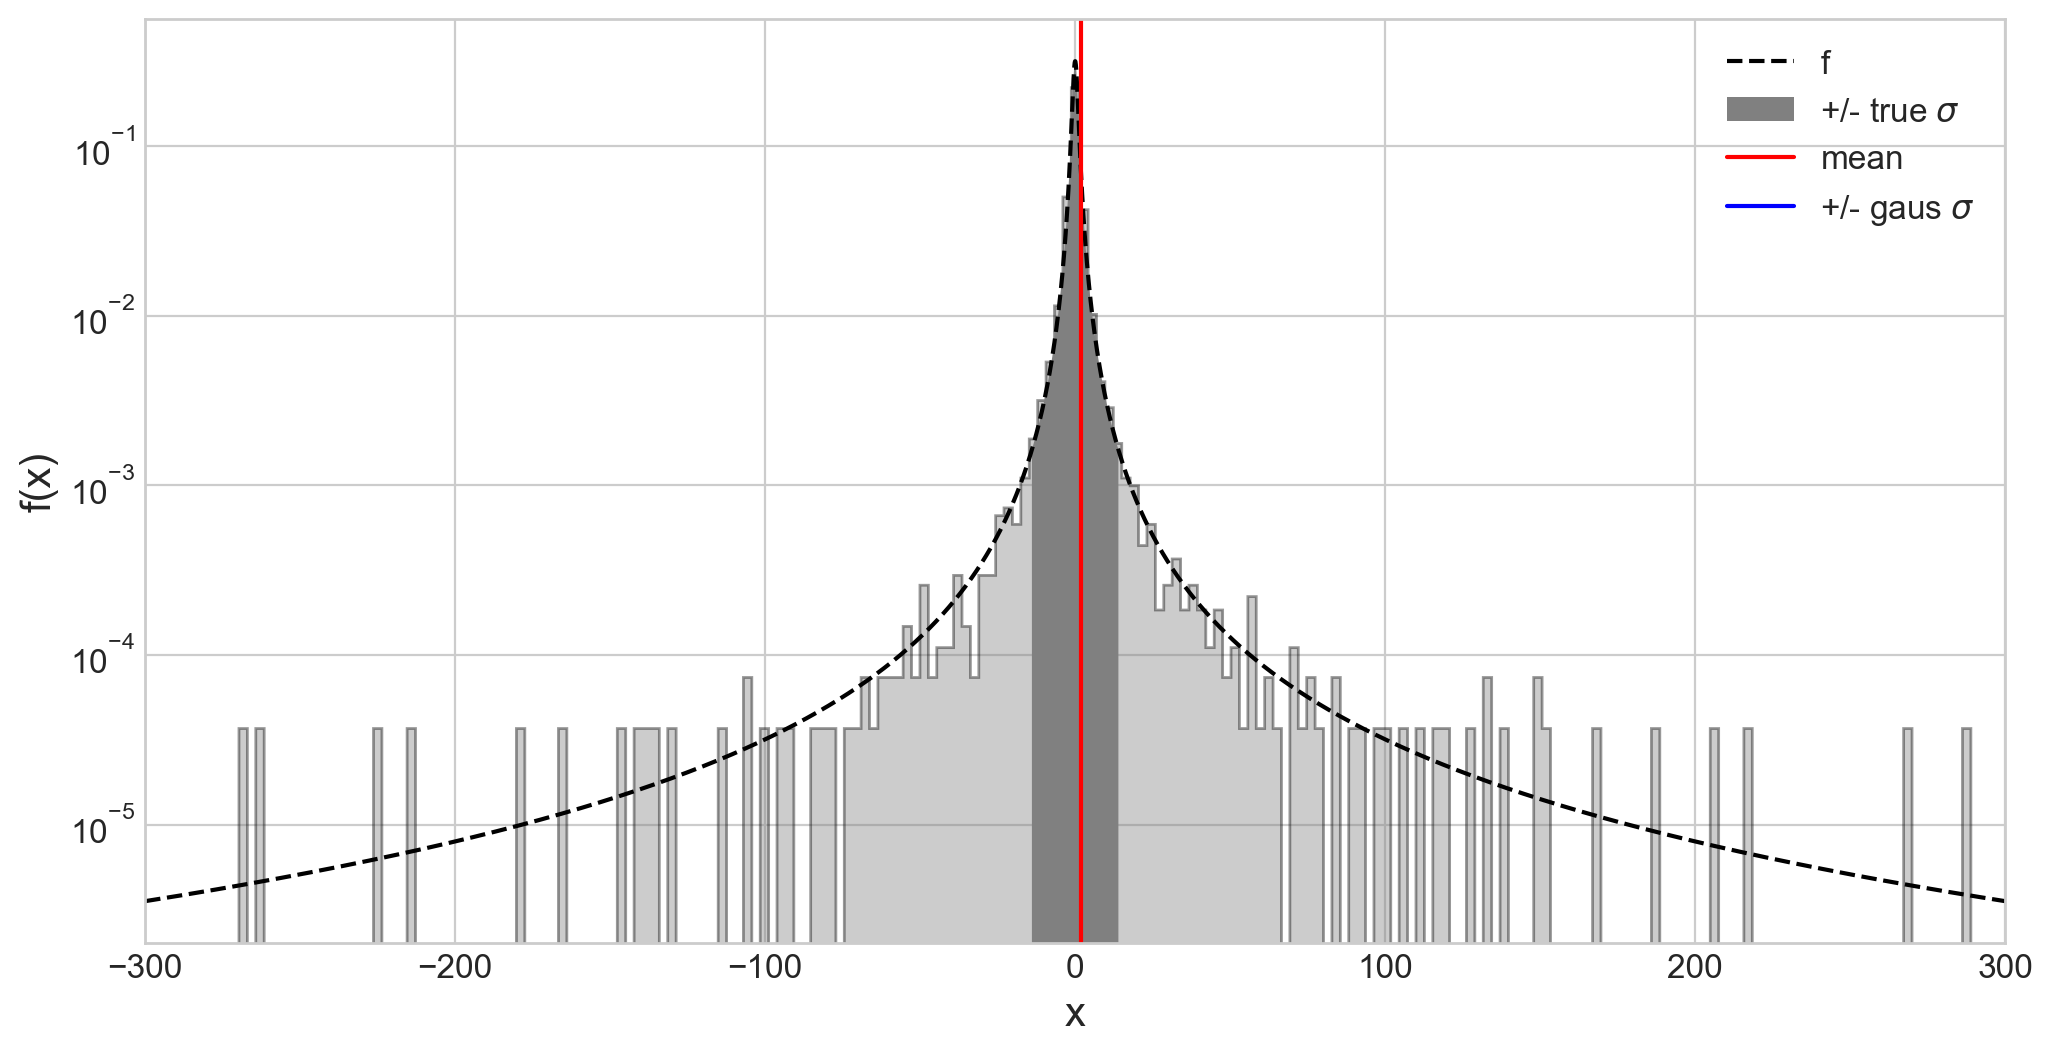

In [21]:
#>>>RUN: L6.3-runcell01

#NOTE: below we define a random seed for identical results between runs.
#These results may appear slightly different from the related video.


#Generate Cauchy data
np.random.seed(6)
y_cauchy = stats.cauchy.rvs(size=10000)


#choose z-score
z=2.0
two_right_tail = stats.cauchy.ppf(1 - stats.norm.cdf(-z))
two_left_tail = stats.cauchy.ppf(1 - stats.norm.cdf(z))
print('left/right-handed values corresponding to z-score:', two_left_tail,two_right_tail)


#print the mean and stdev of the distribution
fig, ax = plt.subplots(figsize=(12, 6))
y_cauchy = stats.cauchy.rvs(size=10000)
print('[mean of cauchy data, stdev of cauchy data]:', y_cauchy.mean(),z*y_cauchy.std())


#plot distribution
ymin = -300
ymax = 300
plt.xlim([ymin,ymax])
x = np.linspace(ymin, ymax, 10000)
y = stats.cauchy.pdf(x, loc=0, scale=1)
plt.plot(x, y, '--', c='black',label="f")
plt.hist(y_cauchy, histtype='stepfilled', edgecolor='k', alpha=0.4, color='gray', density=True,bins=10000)


#plot true-sigma
#plt.fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= two_left_tail), facecolor='grey',label='+/- true $\sigma$')
#plt.fill_between(x, 0, y, where=(np.array(x) > two_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
plt.fill_between(x, 0, y, where=(np.array(x) < two_right_tail) & (np.array(x) >= two_left_tail), facecolor='grey',label='+/- true $\sigma$')


plt.axvline(y_cauchy.mean(), c='red',label="mean")
plt.axvline(y_cauchy.mean()+y_cauchy.std()*z, c='blue',label='+/- gaus $\sigma$')
plt.axvline(y_cauchy.mean()-y_cauchy.std()*z, c='blue')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

As you can see the standard deviation(blue) and the p-values(dark gray) are completely different in scale. This is because the cauchy distribution can have a few events that fluctuate very far in the tails of the away from the mean of the Cauchy distribution. 

In the preceding example with the Cauchy distribution, we found the positions of the left tail, `two_left_tail`, and the right tail, `two_right_tail`, such that the probability that a measurement drawn from the Cauchy distribution falls within the range `[two_left_tail,two_right_tail]` is equal to 0.6827. We chose the bounds to coincide with the confidence level of a Gaussian with z-score equal to 1.

To see that, run the code below.

In [ ]:
#>>>RUN: L6.3-runcell02

#calculate p_value from data
def get_p_value_data(idist, two_left_tail, two_right_tail):
  within_range = []
  for ielem in idist:
    if ielem <= two_right_tail and ielem >= two_left_tail:
      within_range.append(ielem)
  return len(within_range)/len(idist)


#Generate Cauchy data
np.random.seed(6)
y_cauchy = stats.cauchy.rvs(size=10000)

#choose z-score
z=1.0
two_right_tail = stats.cauchy.ppf(1 - stats.norm.cdf(-z))
two_left_tail = stats.cauchy.ppf(1 - stats.norm.cdf(z))

cauchy_p_value = get_p_value_data(y_cauchy, two_left_tail, two_right_tail)
print("p-value from left/right values and data:", cauchy_p_value)
print()

<a name='exercises_6_3'></a>     

| [Top](#section_6_0) | [Restart Section](#section_6_3) | [Next Section](#section_6_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-6.3.1</span>

What is the probability than an event drawn from a Cauchy distribution falls within 1-sigma of the mean? Use the data that we generated above to calculate your probability, and consider using the function `get_p_value_data()` (or write your own).

Enter your answer as a number with precision 1e-3.

In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

#calculate p_value from data
def get_p_value_data(idist, two_left_tail, two_right_tail):
  within_range = []
  for ielem in idist:
    if ielem <= two_right_tail and ielem >= two_left_tail:
      within_range.append(ielem)
  return len(within_range)/len(idist)

#Generate Cauchy data
np.random.seed(6)
y_cauchy = stats.cauchy.rvs(size=10000)

#choose z-score
z=1.0
two_right_tail = #YOUR CODE HERE
two_left_tail = #YOUR CODE HERE

cauchy_p_value = get_p_value_data(y_cauchy, two_left_tail, two_right_tail)
print("p-value from left/right values and data:", cauchy_p_value)
print()


In [ ]:
#>>>SOLUTION

#calculate p_value from data
def get_p_value_data(idist, two_left_tail, two_right_tail):
  within_range = []
  for ielem in idist:
    if ielem <= two_right_tail and ielem >= two_left_tail:
      within_range.append(ielem)
  return len(within_range)/len(idist)

#Generate Cauchy data
np.random.seed(6)
y_cauchy = stats.cauchy.rvs(size=10000)

#choose z-score
z=1.0
two_right_tail = y_cauchy.mean()+y_cauchy.std()*z
two_left_tail = y_cauchy.mean()-y_cauchy.std()*z

cauchy_p_value = get_p_value_data(y_cauchy, two_left_tail, two_right_tail)
print("p-value from left/right values and data:", cauchy_p_value)
print()


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
0.9946
</pre>
        
**EXPLANATION:**
    
Sum the normalized counts between the left/right 1-sigma bounds. For the data that we generated, 99.46% of events fell within this range.
    
</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-6.3.2</span>

What is the p-value that corresponds to a z-score of 1 for a Cauchy distribution? Enter your answer as a number with precision 1e-3.

In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

pass


In [ ]:
#>>>SOLUTION

pM1=stats.cauchy.cdf(-1)
p1=stats.cauchy.cdf(1)
print("p-value corresponding to z-score=1 for Cauchy distribution: ", p1-pM1)
print()


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
0.5
</pre>
        
**EXPLANATION:**
    
See solution code.

    
</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-6.3.3</span>

Which of the following options best describes a 3$\sigma$ detection:

- background noise
- evidence
- discovery


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-6.3.4</span>

Which of the following options best describes a 5$\sigma$ detection:

- background noise
- evidence
- discovery


<a name='section_6_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L6.4 Moments of Distributions and Mapping</h2>  

| [Top](#section_6_0) | [Previous Section](#section_6_3) | [Exercises](#exercises_6_4) | [Next Section](#section_6_5) |


In [ ]:
#>>>RUN: L6.4-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L06/slides_L06_04.html', width=970, height=550)

<h3>Slides</h3>

View the slides for this section below, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L06/slides_L06_04.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L06/slides_L06_04.html" width="900", height="550" frameBorder="0"/>
</p>

<h3>Moments of distributions</h3>

So, you have seen that with certain types of distributions, things can deviate wildly from what is expected. Namely, in the case of a Cauchy or asymmetric distribution, the standard deviation of a data sample is not a reflection of the p-value of the distribution at all. To describe these sorts of distributions, there are a number of ways to mitigate this problem. The first is to introduce higher order moments of a pdf. 

Let's assume our distributions are centered about zero (we can always recenter them using a new variable $x'=x-\bar{x}$). Then, we can write moments of order $n$ as


$$
\begin{equation}
 \mu_{n}=m^{n}(x)=E[x^{n}p(x)] = \int_{-\infty}^{\infty} x^{n} p(x) dx
\end{equation}
$$


The mean is the moment of order 1, $E[p(x)]=m^{1}(x)$, and the variance of the distribution is the 2$^{\textrm{nd}}$ order moment, $V[p(x)]=m^{2}(x)$. These are the two properties of a distribution that you already know and love, but we can keep going to higher order moments in order to describe more complicated distributions. The next moment, called "skewness", tells you how asymmetric a distribution is; $\mathrm{Skew}=m^{3}(x)$, and going further we have the $\mathrm{Kurtosis}=m^{4}(x)$, which tells you how important the tails of a distribution are. 

Lots of different distributions can be found in data. Here is a "story book of distributions":
http://bois.caltech.edu/dist_stories/t3b_probability_stories.html

Note that this link is also a nice concise summary of a wide range of distributions, including their functional forms and a brief description of their properties.

Let's take a look at the moments of our two example distributions discussed above. 


In [22]:
#>>>RUN: L6.4-runcell01

def raw_moment(X, k, c=0):
    return ((X - c)**k).mean()

def central_moment(X, k):
    if k == 1:
        return X.mean()
    return raw_moment(X=X, k=k, c=X.mean())

def print_moments(X,label):
    print(label+" mean:",central_moment(X,1))
    print(label+" var:" ,central_moment(X,2))
    print(label+" skew:",central_moment(X,3))
    print(label+" kurtosis:",central_moment(X,4))

N=1000000
y_norm = stats.norm.rvs(size=N)
print_moments(y_norm,"normal")

df=9
y_chi2 = stats.chi2.rvs(size=N,df=df)
print_moments(y_chi2,"chi2 df "+str(df))

y_cauchy = stats.cauchy.rvs(size=N)
print_moments(y_cauchy,"cauchy")


normal mean: 0.00033731036271289304
normal var: 0.9989319952612497
normal skew: 0.0010553347878322255
normal kurtosis: 2.993641541642382
chi2 df 9 mean: 8.996550939830659
chi2 df 9 var: 17.923887127019515
chi2 df 9 skew: 71.45319777664875
chi2 df 9 kurtosis: 1387.7251215350327
cauchy mean: 5.745462246061685
cauchy var: 30690800.845918037
cauchy skew: 157344072810834.62
cauchy kurtosis: 8.555232721632874e+20


Now, the nice thing about moments is that you can use these values to map any distribution to any other distribution. 

I am not really doing justice to the above, but moments are in fact incredibly useful. A chunk of my PhD thesis is dedicated to using moments of a Gaussian (cumulants) to model distributions with a small amount of data. 

In light of this, what we can imagine doing is to use a transform, like we do with a Fourier transform. Through the use of z-scores and moments, you can transform one probability distribution function into any another. The strategy here is to match quantiles, or z-scores, with each other, such that you have for a transform from $x\rightarrow x^{\prime}$, which does this matching for distributions $p_{1}$ and $p_2$:

$$
\begin{equation}
\int_{-\infty}^{x} p_1(x) dx = \int_{-\infty}^{x^\prime} p_2(x^{\prime}) dx^{\prime}
\end{equation}
$$

To do this mapping there are many different approaches. All of these approaches do roughly the same thing, map one pdf to another pdf.  One such approach of mapping distributions is the [box-cox method](https://en.wikipedia.org/wiki/Power_transform) aims to use the moments to transform any distribution into a Gaussian distribution. Let's see how well it works.

To do this we are going to sample a lognormal distribution using `stats.lognorm`.  This distribution is very much not a Gaussian, as we will see. 

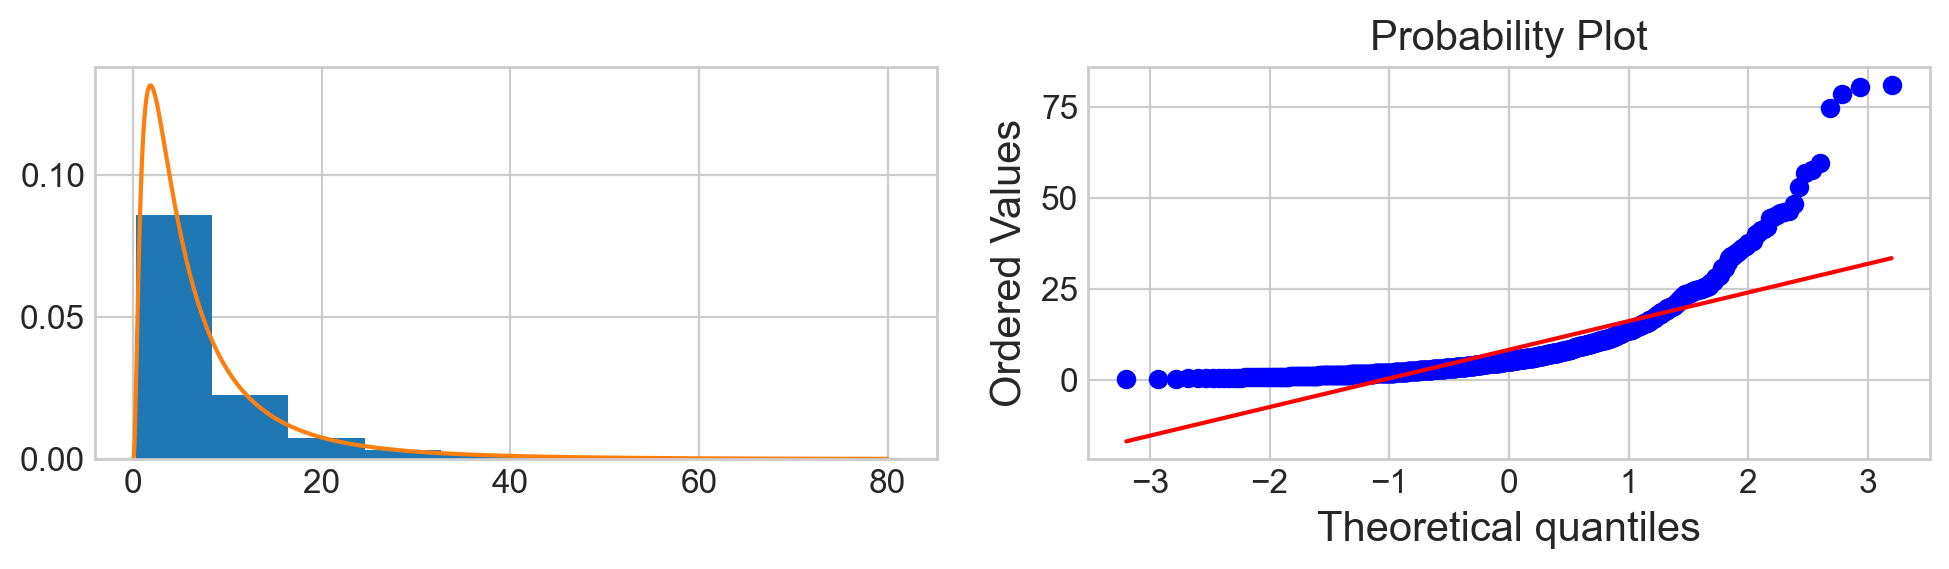

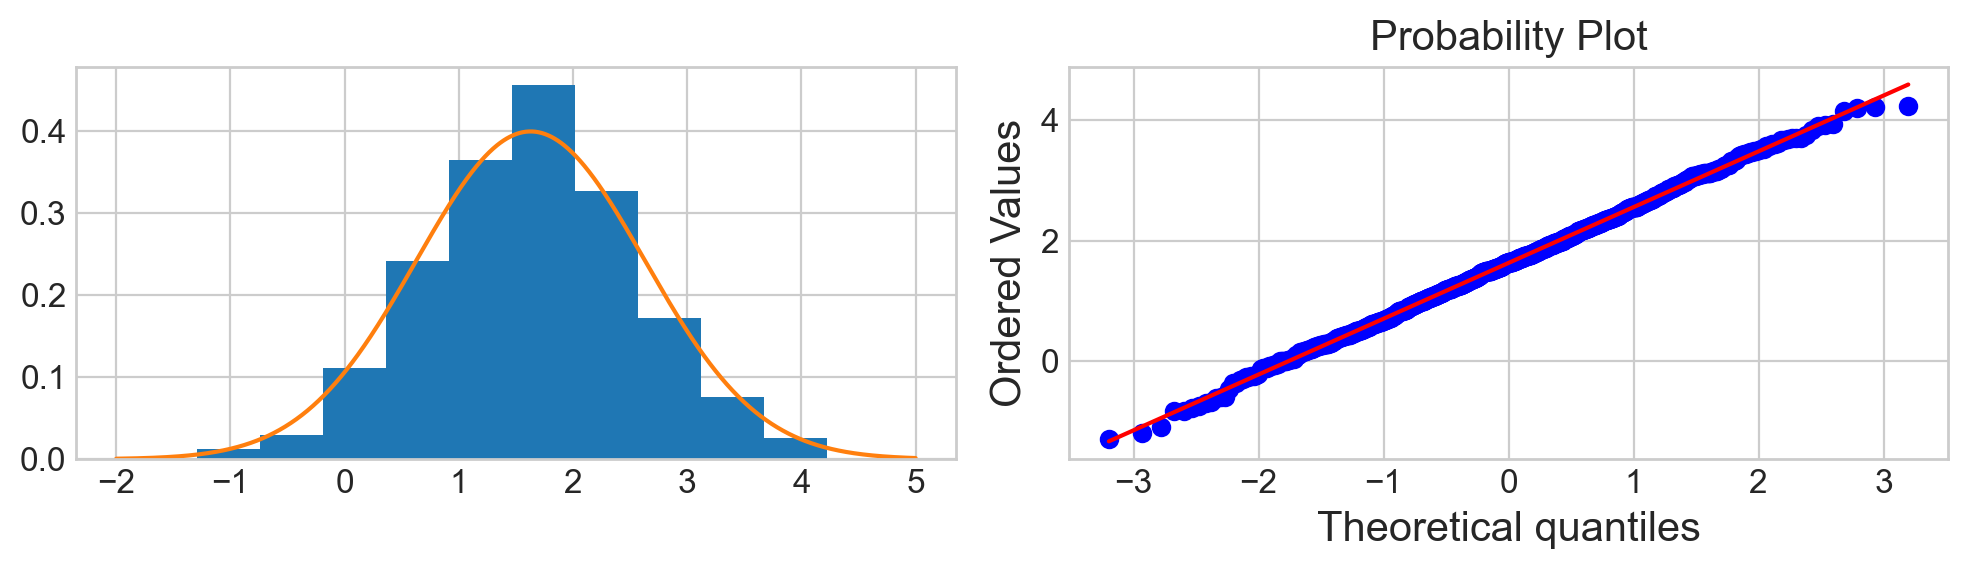

In [23]:
#>>>RUN: L6.4-runcell02

x = stats.lognorm.rvs(s=1, loc=0, scale=5, size=1000, random_state=4)

# plot
def plotdistandq(x,xaxis,evals):
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    axes[0].hist(x,density=True)
    axes[0].plot(xaxis,evals)
    stats.probplot(x, dist=stats.norm, plot=axes[1])
    fig.tight_layout()

xaxis=np.linspace(0,80, 1000)
evals=stats.lognorm.pdf(xaxis,s=1, loc=0, scale=5)
plotdistandq(x,xaxis,evals)
# box-cox transform
xt, lmbda = stats.boxcox(x)

#now plot gaussian
gxaxis = np.linspace(-2, 5, 1000)
gevals = stats.norm.pdf(gxaxis,xt.mean(),1) 
plotdistandq(xt,gxaxis,gevals)

stats.probplot(xt, dist=stats.norm, plot=axes[1])
fig.tight_layout()

These types of transforms are particularly useful when are trying to match a simulated distribution with a data distribution. If both the simulated and true distributions are trying to describe the same thing, you can use a transform like this to map one distribution onto the other.

<h3>Applying this Method to Cauchy Distribution</h3>

Let's now do this for a more complciated Cauchy distribution, and see how it behaves. In fact, let's take the absolute value of it. 

mean: -0.00941780203995736


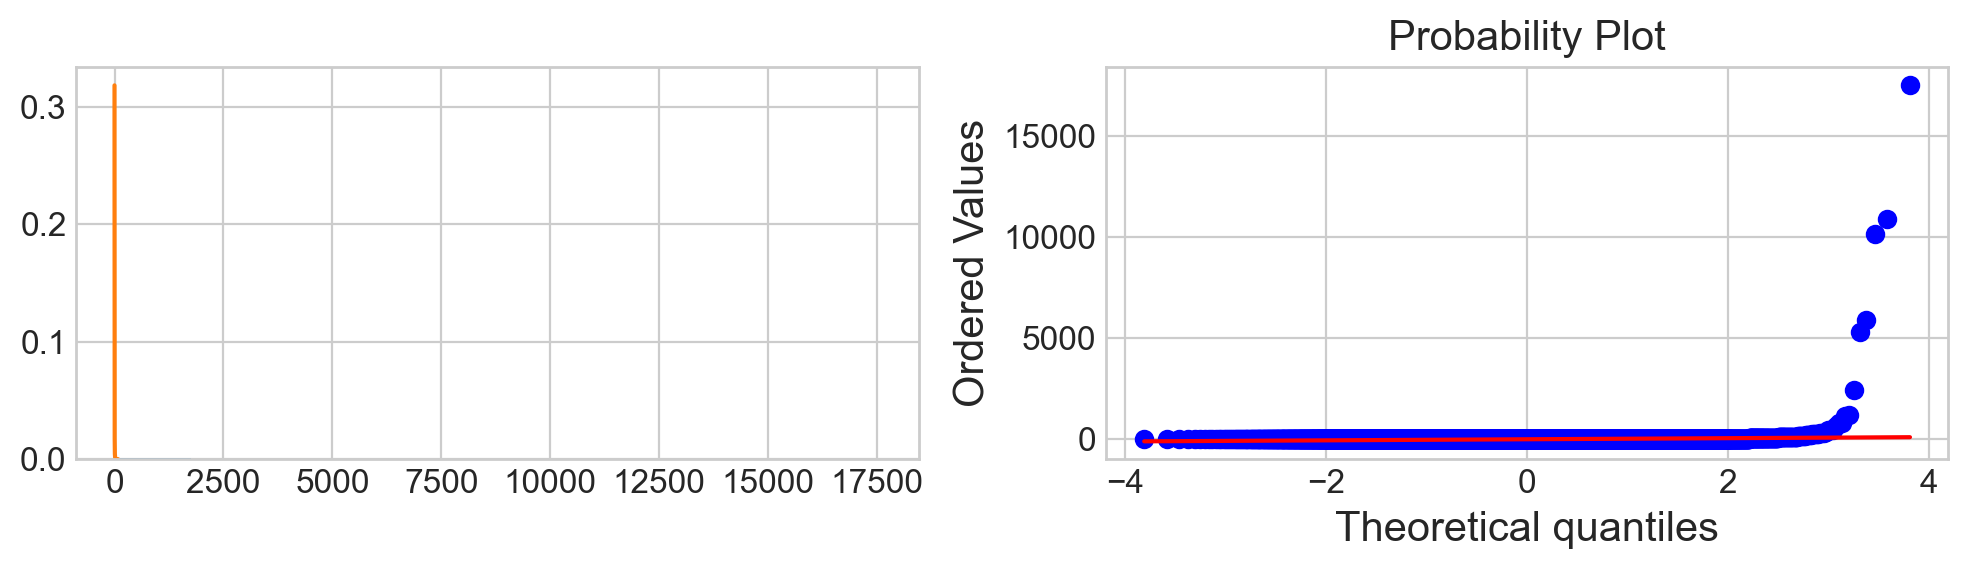

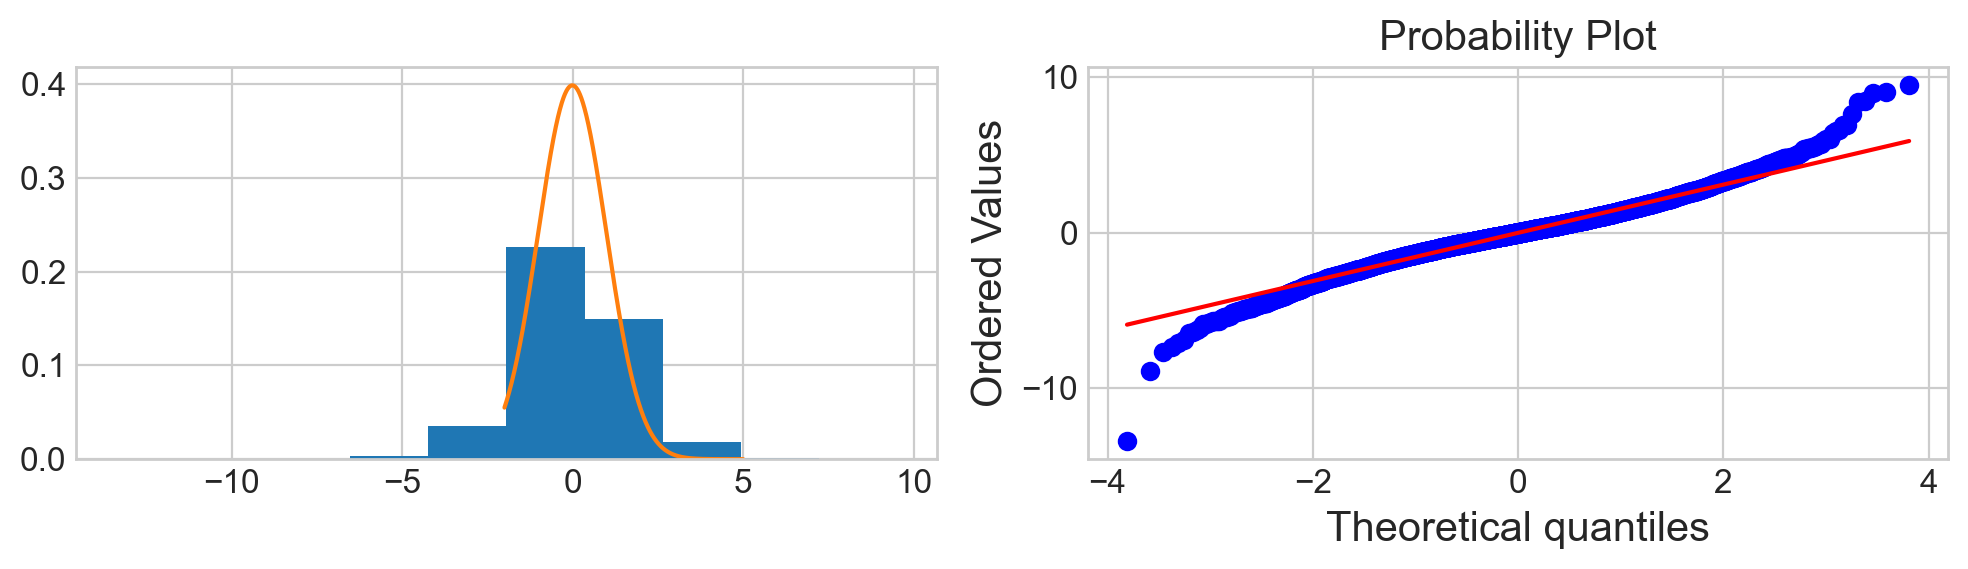

In [24]:
x = np.abs(stats.cauchy.rvs(size=10000))

xaxis=np.linspace(0,80, 1000)
evals=np.abs(stats.cauchy.pdf(xaxis))
plotdistandq(x,xaxis,evals)
# box-cox transform
xt, lmbda = stats.boxcox(x)

#now plot gaussian
gxaxis = np.linspace(-2, 5, 1000)
gevals = stats.norm.pdf(gxaxis,xt.mean(),1) 
plotdistandq(xt,gxaxis,gevals)

stats.probplot(xt, dist=stats.norm, plot=axes[1])
fig.tight_layout()

print("mean:",xt.mean())
           

The Cauchy distribution is a hard distribution to model because of its giant tails. However, in the bulk it is very much Gaussian, so using a box-cox does surprisingly well in the cental region. However, in the far tails it starts to deviate quite a bit.

<a name='exercises_6_4'></a>     

| [Top](#section_6_0) | [Restart Section](#section_6_4) | [Next Section](#section_6_5) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-6.4.1</span>

Take $\chi^2$ distriubtion of 1 degree of freedom, which is very asymmetric and map it onto a Gaussian. What is the mean of this distribution?

Complete the code below, which uses a random seed to ensure your answer will match ours. Enter your answer as a number with precision 1e-3.


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

np.random.seed(10)
x = stats.chi2.rvs(size=10000,df=9)

#YOUR CODE HERE

print("mean:",xt.mean())


In [ ]:
#>>>SOLUTION

np.random.seed(10)
x = stats.chi2.rvs(size=10000,df=1)

xaxis=np.linspace(0,80, 1000)
evals=np.abs(stats.chi2.pdf(xaxis,df=1))
plotdistandq(x,xaxis,evals)
# box-cox transform
xt, lmbda = stats.boxcox(x)

#now plot gaussian
gxaxis = np.linspace(-2, 5, 1000)
gevals = stats.norm.pdf(gxaxis,xt.mean(),1) 
plotdistandq(xt,gxaxis,gevals)

stats.probplot(xt, dist=stats.norm, plot=axes[1])
fig.tight_layout()

print("mean:",xt.mean())


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
The mean is less than zero. For the random seed used, it is -0.7882037.
</pre>
        
**EXPLANATION:**
The $\chi^{2}$ distribution is very asymmetric, this poses a challenge to map into onto a gaussian, so we can only do so well. As a result, we end up with a distribution with a mean less than zero and asymmetrc widths. 
    
</div>


<a name='section_6_5'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L6.5 Returning to Fitting Supernova Data</h2>  

| [Top](#section_6_0) | [Previous Section](#section_6_4) | [Exercises](#exercises_6_5) | [Next Section](#section_6_6) |


<h3>A more sophisticated fit</h3>

Now that we have gone on an excursion to understand properties of fits, let's go ahead and analyze our supernovae data, and try to pull in all of the information that we can. Let's first look at our linear fit.  One sec, while we load it all:


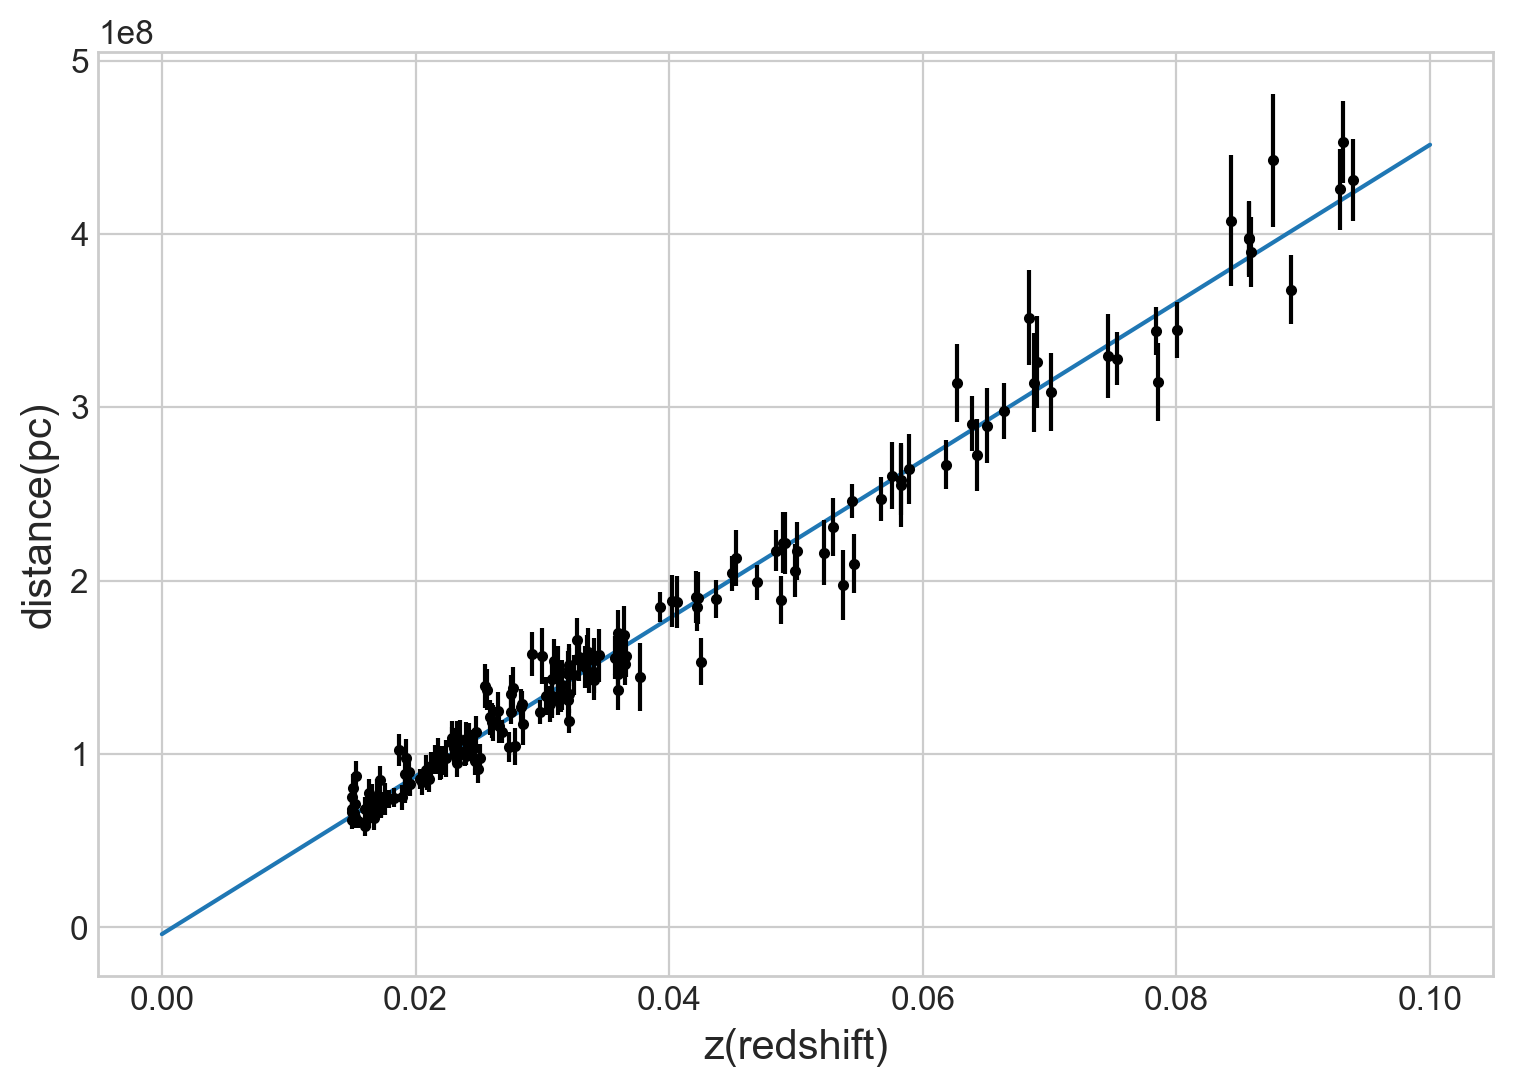

In [25]:
#>>>RUN: L6.6-runcell01
import math
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy import stats

#Let's try to understand how good the fits we made in last Lesson are, let's load the supernova data again
label='data/sn_z_mu_dmu_plow_union2.1.txt'

def distanceconv(iMu):
    power=iMu/5+1
    return 10**power

def distanceconverr(iMu,iMuErr):
    power=iMu/5+1
    const=math.log(10)/5.
    return const*(10**power)*iMuErr

def load(iLabel,iMaxZ=0.1):
    redshift=np.array([])
    distance=np.array([])
    distance_err=np.array([])
    with open(iLabel,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter='\t')
        for row in plots:
            if float(row[1]) > iMaxZ:
                continue
            redshift = np.append(redshift,float(row[1]))
            distance = np.append(distance,distanceconv(float(row[2])))
            distance_err = np.append(distance_err,distanceconverr(float(row[2]),float(row[3])))
    return redshift,distance,distance_err  
        
#Now let's run the regression again
def variance(isamples):
    mean=isamples.mean()
    n=len(isamples)
    tot=0
    for pVal in isamples:
        tot+=(pVal-mean)**2
    return tot/n

def covariance(ixs,iys):
    meanx=ixs.mean()
    meany=iys.mean()
    n=len(ixs)
    tot=0
    for i0 in range(len(ixs)):
        tot+=(ixs[i0]-meanx)*(iys[i0]-meany)
    return tot/n

def linear(ix,ia,ib):
    return ia*ix+ib

redshift,distance,distance_err=load(label)
var=variance(redshift)
cov=covariance(redshift,distance)
A=cov/var
const=distance.mean()-A*redshift.mean()
xvals = np.linspace(0,0.1,100)
yvals = []
for pX in xvals:
    yvals.append(linear(pX,A,const))

plt.plot(xvals,yvals)
plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.xlabel("z(redshift)")
plt.ylabel("distance(pc)")
plt.show()

Now that we have loaded the data, let's actually look at the residuals. What this means is that we are going to compute the difference between the mean predicted value in $y$ and the true data points. 

residuals mean: 0.0674380962700456
residuals var: 0.9619236126333892
residuals skew: 0.1553936844426706
residuals kurtosis: 3.274051707095445
normal distribution mean: 0.014199340173086144
normal distribution var: 0.9607676651862049
normal distribution skew: -0.07104886652836655
normal distribution kurtosis: 2.783246576202904


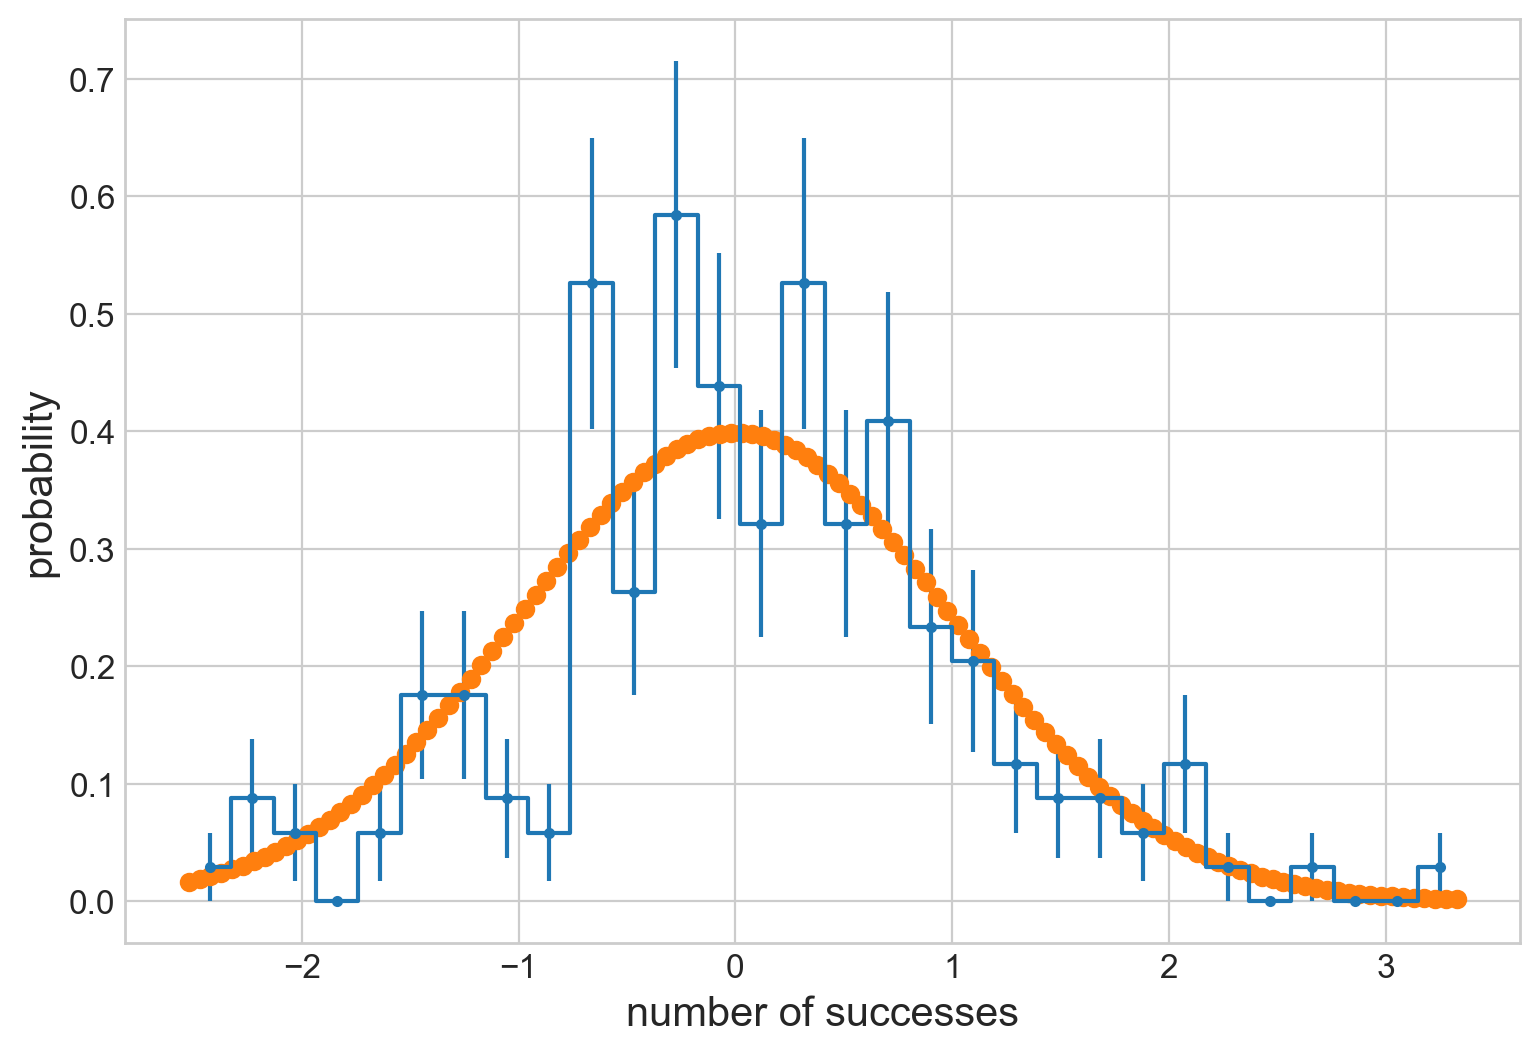

In [26]:
#>>>RUN: L6.6-runcell02

def residualsComp(redshift,distance,distance_err):
    #Compute residuals
    residuals=np.array([])
    for i0 in range(len(redshift)):
        pResid=linear(redshift[i0],A,const)-distance[i0]
        residuals = np.append(residuals,pResid/distance_err[i0])
    
    #Make a histogram
    y0, bin_edges = np.histogram(residuals, bins=30)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
    plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
    
    #Plot a Gaussian
    k=np.arange(bin_edges[0],bin_edges[-1],0.05)
    normal=stats.norm.pdf(k,0,1)
    #First let's look at the moments 
    normalpoints=stats.norm.rvs(0,1,1000)
    print_moments(residuals,"residuals")
    print_moments(normalpoints,"normal distribution")

    #Now let's plot it
    plt.plot(k,normal,'o-')
    plt.xlabel("number of successes")
    plt.ylabel("probability")
    plt.show()
    return residuals

residuals=residualsComp(redshift,distance,distance_err)

What we see is that the mean of the residuals is very close to 0 with a variance of 1, and a skew and kurtosis really close to a normal distribtuion. This looks likes our residuals are Gaussian (in fact, we have plotted a Gaussian distribution on top of our fit). What do you think that means for our fit? 

Recall that a $\chi^{2}$ distribution is defined as a sum of $N$ gaussian distributed variables with mean $0$ and width $1$. For a fit this means that if we compute the residuals divided by their uncertainties, we get the value

$\chi^{2} = \sum_{i} \left(\frac{y_{i}-f(x{i})}{\sigma}\right)^{2}$ 

which should be distributed by a $\chi^{2}$ distribution. This is why we call this parameter $\chi^2$. I know this sounds a little circular, but it does make sense.  Anyway the fit should be distributed by a $\chi^{2}$ distribution given by the number of degrees of freedom, which in this case is the number of points minus the number of parameters we floated in the fit, which in this case is $2$. 

Let's check it out. 

Total chi2: 169.1325141558355 NDOF 173
Normalized chi2: 0.977644590496159
Probability of chi2: 0.5688982622097782

Central Value 172.3337919816806
Sigma Low -18.526264786058277
Sigma High 19.957893469399238


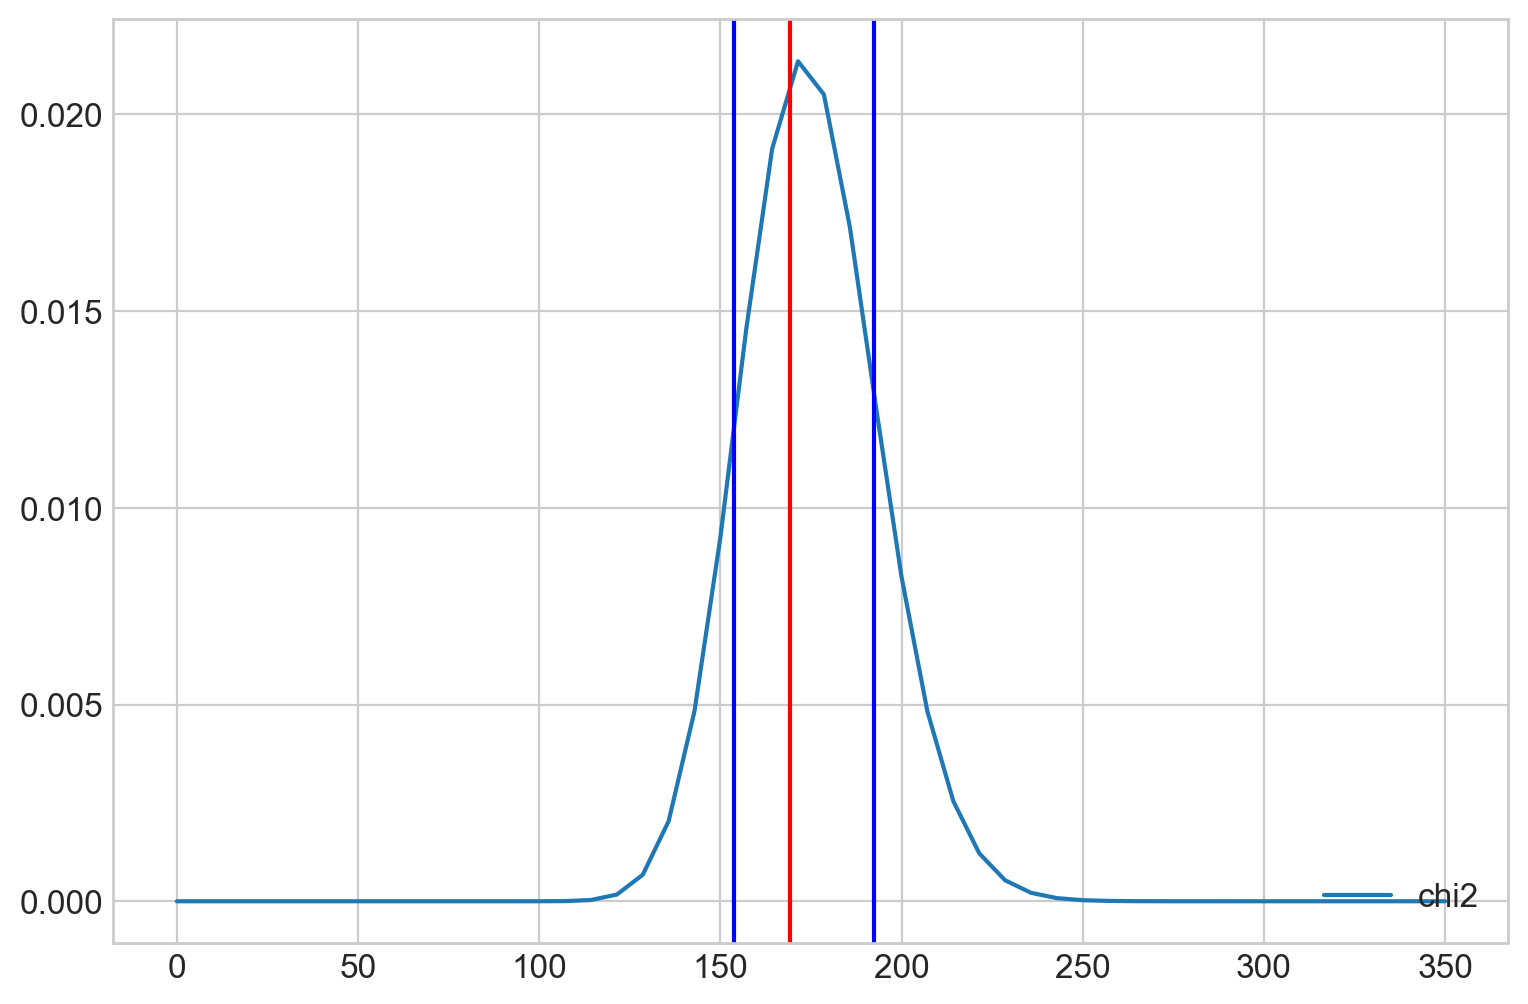

In [28]:
#>>>RUN: L6.6-runcell03

#now let's look at the chi2
chi2=np.sum(residuals**2)

print("Total chi2:",chi2,"NDOF",len(residuals)-2)
print("Normalized chi2:",chi2/(len(residuals)-2))
print("Probability of chi2:",1-stats.chi2.cdf(chi2,(len(residuals)-2)))
print()

#Let's plot it for good measure too
x = np.linspace(0,len(residuals)*2)
chi2d=stats.chi2.pdf(x,len(residuals-2)) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2, c='red')
plt.legend(loc='lower right')

ndof=(len(residuals)-2)
chi2ppf0=stats.chi2.ppf(0.5,ndof)
chi2ppf1=stats.chi2.ppf(0.15,ndof)
chi2ppf2=stats.chi2.ppf(0.85,ndof)
#chi2ppf1=stats.chi2.ppf(0.025,ndof)
#chi2ppf2=stats.chi2.ppf(1-0.025,ndof)
print("Central Value",chi2ppf0)
print("Sigma Low",chi2ppf1-chi2ppf0)
print("Sigma High",chi2ppf2-chi2ppf0)

plt.axvline(chi2ppf1, c='blue')
plt.axvline(chi2ppf2, c='blue')
plt.show()

We see that the $\chi^{2}$ value is very close to the number of degrees of freedom, with a normalized $\chi^{2}/NDF \approx1$, that is a legitimately good fit! Let's loosen the data by increasing the overall range of redshifts that we will fit, since above we only fit a small region of redshift fits. 

<a name='exercises_6_5'></a>     

| [Top](#section_6_0) | [Restart Section](#section_6_5) | [Next Section](#section_6_6) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-6.5.1</span>

Anything above ___ for chi squared probability is a sign of a good fit. Enter your answer as number with precision 1e-3.

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
0.05
</pre>
        
**EXPLANATION:**
    
While there is no hard and set rule for this, we tend to use 5% as the baseline for what we call a good $\chi^{2}$ value. It is always good to keep this in mind. 
    
</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-6.5.2</span>

For a normal distribution, a good fit has a normalized chi squared value near ___. Enter your answer as number with precision 1e-3.

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-6.5.3</span>

Ok, now let's repeat the linear fit above without a cut on the redshift. Let's run our full slew of metrics on it like we did before. Complete the code below and analyze the output.

What is the value of the normalized (or reduced) chi-square metric? Is this a good fit or a bad fit? Enter your answer as a number with precision 1e-2.

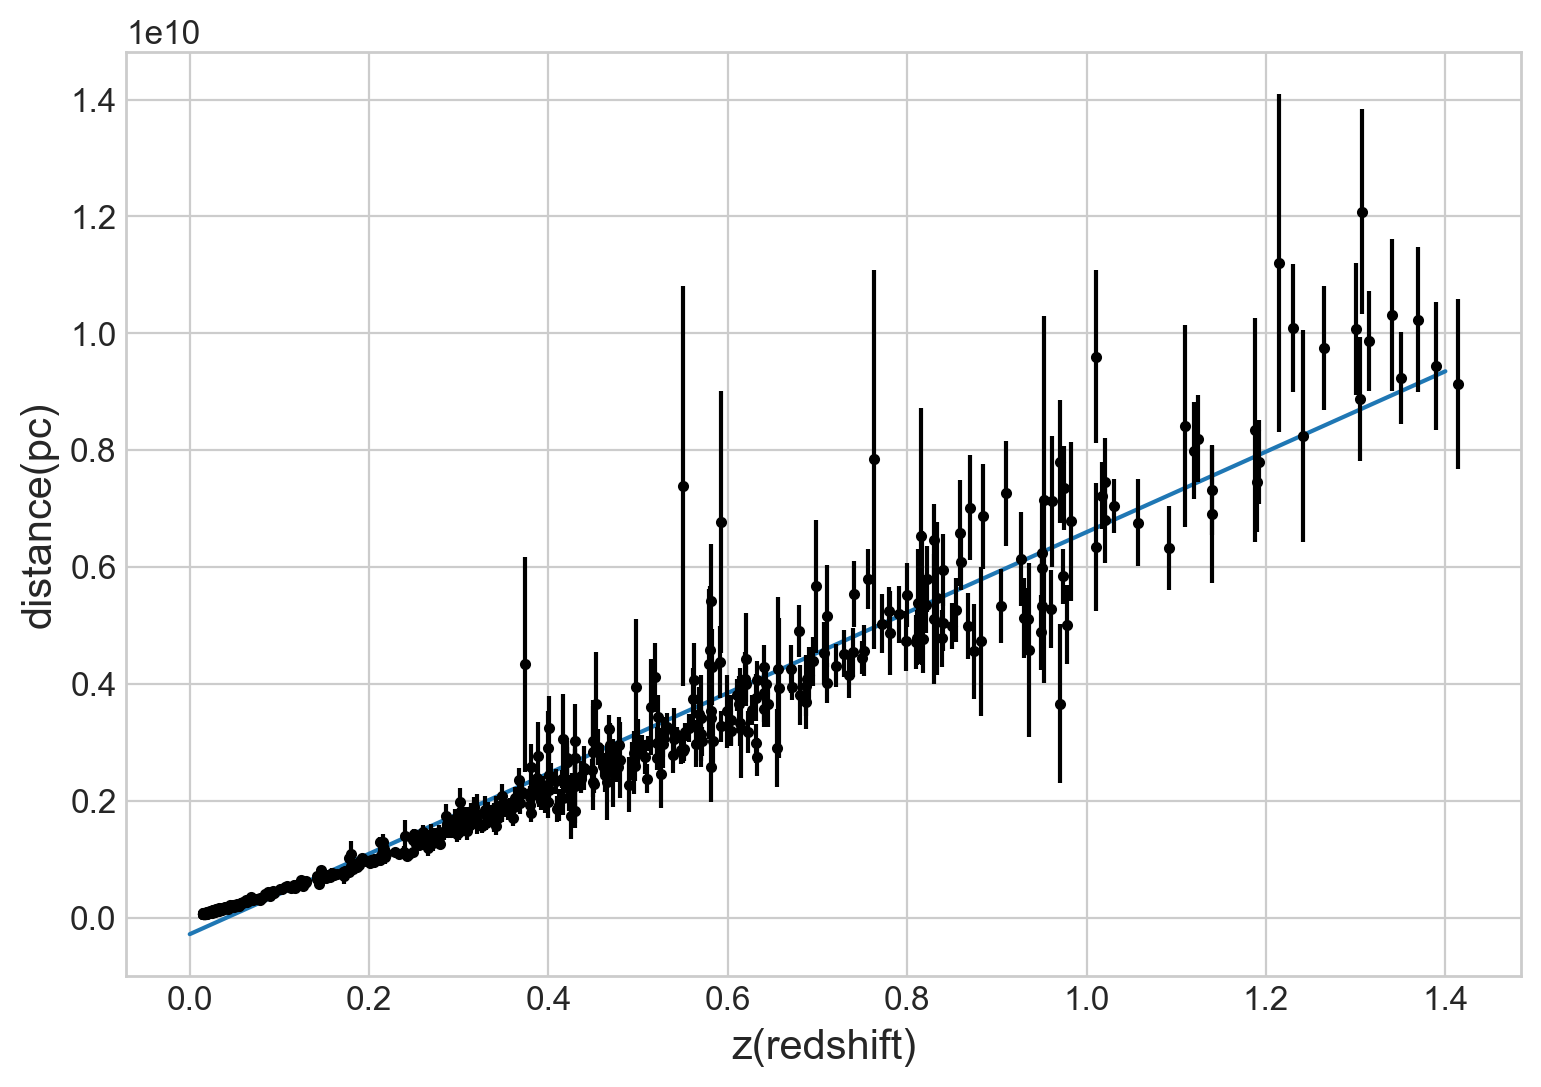

residuals mean: -5.4690139399836575
residuals var: 134.2507160558813
residuals skew: -2673.0893464472424
residuals kurtosis: 92943.88421254256
normal distribution mean: -0.006288848134375231
normal distribution var: 0.955267063990928
normal distribution skew: 0.10107100608695849
normal distribution kurtosis: 2.8550499722839513


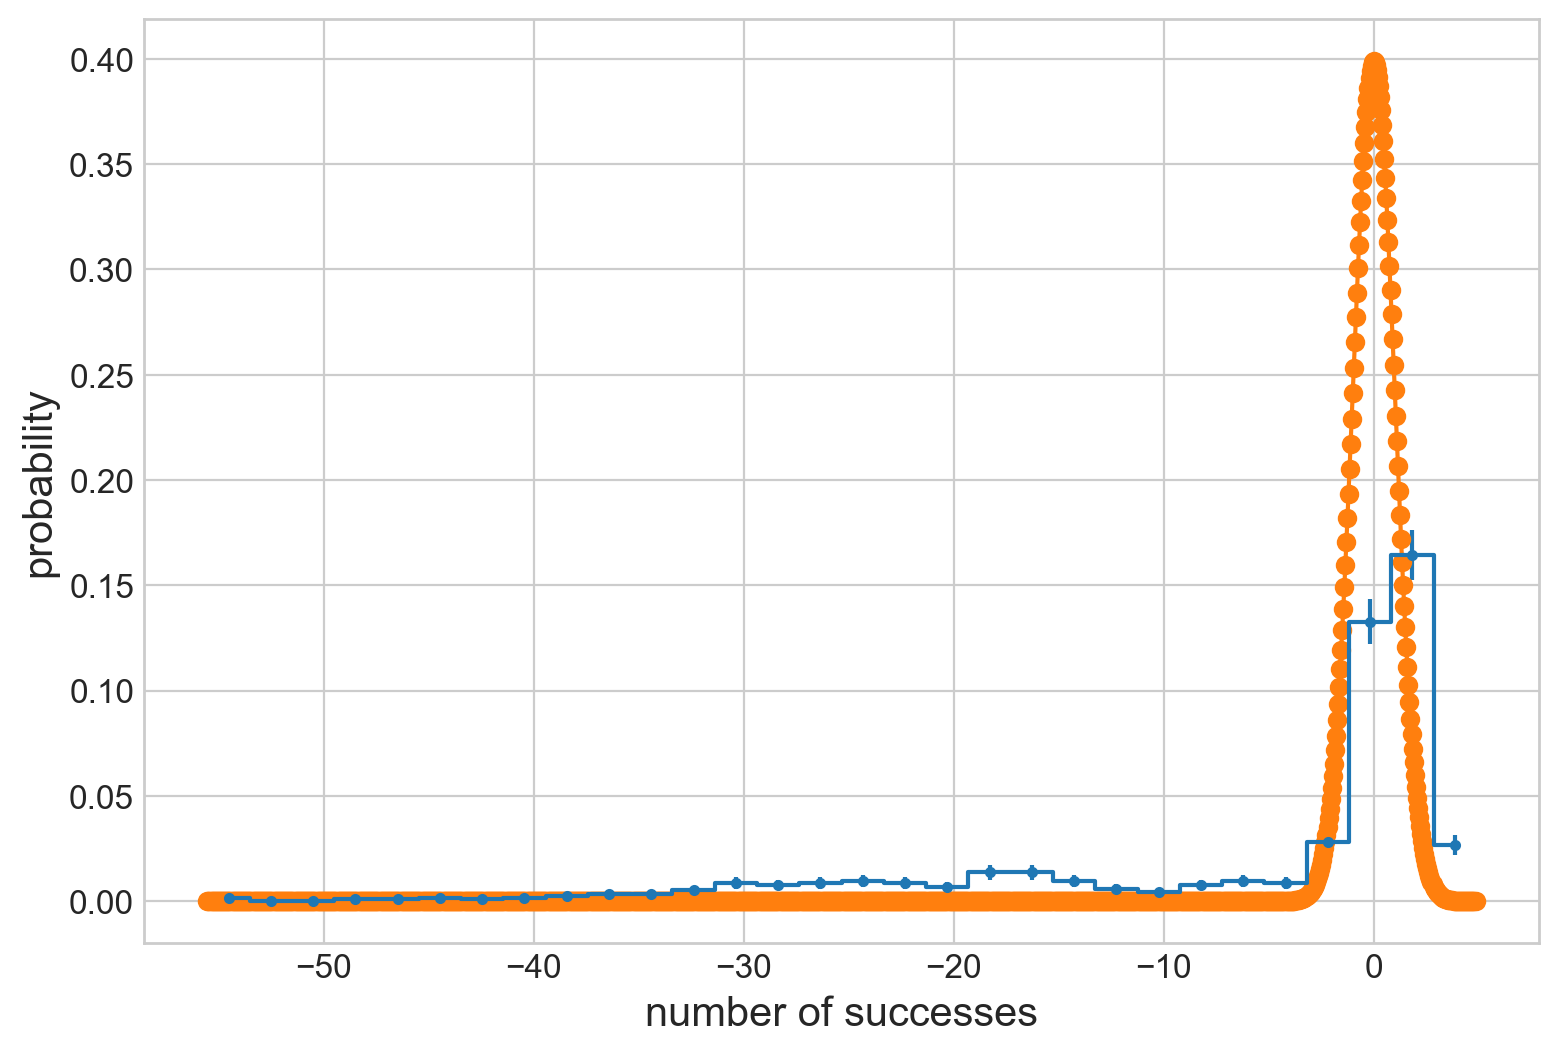

In [29]:
#>>>RUN

#solution

#run regression
redshift,distance,distance_err=load(label,10000)
var=variance(redshift)
cov=covariance(redshift,distance)
A=cov/var
const=distance.mean()-A*redshift.mean()
xvals = np.linspace(0,1.4,100)
yvals = []
for pX in xvals:
    yvals.append(linear(pX,A,const))

#plot it
plt.plot(xvals,yvals)
plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.xlabel("z(redshift)")
plt.ylabel("distance(pc)")
plt.show()

residuals=residualsComp(redshift,distance,distance_err)
#now let's look at the chi2
#YOUR CODE HERE

In [ ]:
#>>>SOLUTION

#run regression
redshift,distance,distance_err=load(label,10000)
var=variance(redshift)
cov=covariance(redshift,distance)
A=cov/var
const=distance.mean()-A*redshift.mean()
xvals = np.linspace(0,1.4,100)
yvals = []
for pX in xvals:
    yvals.append(linear(pX,A,const))

#plot it
plt.plot(xvals,yvals)
plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.xlabel("z(redshift)")
plt.ylabel("distance(pc)")
plt.show()

residuals=residualsComp(redshift,distance,distance_err)
#now let's look at the chi2
chi2=np.sum(residuals**2)
print("Total chi2:",chi2,"NDOF",len(residuals)-2)
print("Normalized chi2:",chi2/(len(residuals)-2))
print("Probability of chi2:",1-stats.chi2.cdf(chi2,(len(residuals)-2)))

#Let's plot it for good measure too
x = np.linspace(0,len(residuals)*2)
chi2d=stats.chi2.pdf(x,len(residuals-2)) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2, c='red')
plt.legend(loc='lower right')
plt.show()

<a name='section_6_6'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L6.6 Fitting with a More Accurate Model</h2>  

| [Top](#section_6_0) | [Previous Section](#section_6_5) | [Exercises](#exercises_6_6) | [Next Section](#section_6_7) |


<h3>Overview</h3>

When our fits don't work well, what we need to do is come up with a better fit function. There are many ways to come up with a better function. Sometimes we just guess what a better function is. However, the best way to come up with a better function is to use our knowledge of the data and physics. 

When we expand the range of redshifts, what we are doing is looking at a larger range of the universe. That means that we need to come up with a better model of the universe. Fortunately, in this case there has been a lot of work towards building a better model of the universe. This work has led us to the so called Friedmann equations for the expansion of the universe. 

We can write the <a href="https://en.wikipedia.org/wiki/Friedmann_equations" target="_blank">Friedmann equations</a> in terms of the Hubble constant $h$ relative to its current value $h_{0}$ and the density parameters of the universe for matter $\Omega_{m}$, Dark Matter $\Omega_{DM}$, Radiation density $\Omega_{r}$, curvature of the universe $\Omega_{\kappa}$ and dark Energy $\Omega_{\Lambda}$ as  

$\left(\frac{\dot{h}}{h_0}\right)^{2} = (\Omega_{m} + \Omega_{\rm DM})a^{-3}+\Omega_{r}a^{-4} + \Omega_{\kappa} a^{-2} + \Omega_{\Lambda}$

Here, the parameter $a$ is the scale parameter of the universe. This is often referred to as the cosmic scale. The way to think about this is that this is the average distance between all the galaxies in the universe at any period of time in the uiverse. When the big bang happened the scale $a\rightarrow0$ or in otherwords all the galaxies are next to each other. As the universe expands a gets larger and at some point $a\rightarrow\infty$ or if the universe collapses back in on itself in phenomenon known as the big crunch $a$ would actually tend towards 0 again. To make life simple, we tend to take $a=1$ for our current period of time. What this means is we are choosing our units conveniently so that this distance is 1 now in our galactic equation. At our time we also have that Hubble's constant $h$, which varies with the age of the universe thus becomes $h_{0}$. As a result, we can write the above equation as 

$$1 = (\Omega_{m} + \Omega_{\rm DM})+\Omega_{r}+ \Omega_{\kappa} + \Omega_{\Lambda}$$

Now, we can further simply this by our knowledge of the universe $\Omega_{r}$ is the density from radiation. We don't see a huge amount of radiation appearing in our current universe, so we can set $\Omega_{r}=0$. In reality, we can actually test this. To make life simpler, we can really separate $\Omega_{m}$ from $\Omega_{\rm DM}$, so let's call this $\Omega_{M}$. Finally, for now let's set $\Omega_{\kappa}=0$. You will investigate this later. 

This gives us the following equation: 

$$1 = \Omega_{M}+ \Omega_{\Lambda} {\rm  ~or~ } \Omega_{\Lambda} = 1- \Omega_{M}$$  

and furthermore, we can rewrite the above equation as 

$$\left(\frac{\dot{h}}{h_0}\right)^{2} = (\Omega_{M})a^{-3} + 1-\Omega_{M}$$

So at this point you might be asking what does this have to do with our data, which is distance versus redhift. While it turns out we can define both distance and redshift by parameters in the above equation. First, let's define distance. What we are looking for is the distance that light travels to a galaxy far away. As we go further in distance, we go earlier in the universe. So if we know the age of the universe $t$ relative to our current time, we know that the light travelled $d=ct$. Anyway, let's derive $t$ as a function of our scale parameter $a$ to see how it evolves. If its not exactly clear what is going on, just wait. 

Hubbles constant $h$ is a measure of the rate of expansion of the universe. This is just equal to the time derivative of the scale parameter $a$, or in other words:

$$\frac{da}{dt}= h =h_{0} \sqrt{(\Omega_{M})a^{-3} + 1-\Omega_{M}}$$

From this we can separate our equation into parts to notice that 

$$\int h_{0} dt = h_{0} t = \int \frac{da}{\sqrt{(\Omega_{M})a^{-3} + 1-\Omega_{M}}}$$

Finally, the distance that light travels for a time $t$ is $d=ct$, so we can define distance as 

$$ d(a) = ct = \frac{c}{h_{0}}\int \frac{da}{\sqrt{(\Omega_{M})a^{-3} + 1-\Omega_{M}}}$$

This $d$ is often referred to as the comoving distance, this is the distance on your y axis. 

Now the x-axis is redshift. Redshift is how much light got stretched compared to the present day. As the universe expands, it also stretches light outwars. Thats because light moving in an expanding medium will stretch out. The redshift is thus proportional to our scale parameter $a$. Since the redshift is currently $0$ and proportional to $a$ we have that for $a=1$ $z=0$, and for $a\rightarrow0$ $z\rightarrow\infty$ or $z\propto 1/a$, this allows us to immediatly write the value for $z$ as below

$$z = \frac{1}{a}-1$$

Likewise

$$a=\frac{1}{1+z}$$

this finally gives us a function $d(z)$

$$ d(z) = ct = \frac{c}{h_{0}}\int_{0}^{z} \frac{dz^{\prime}}{\sqrt{\Omega_{M}(1+z^{\prime})^{3} + 1-\Omega_{M}}}$$

Where now we have finally put bounds on the integral to correspond to the actual value of $z$ we are choosing. Note that we integrate over a range of $z^{\prime}$ to get the value of $z$ that we want to use. The above is referred to as the co-moving distance. 

Finally, before we actually go to our data, we actually need to correct the co-moving distance by a correction to account for that the fact that we are measuring the luminosity distance and not the co-moving distance.  The luminosity distance is defined as  the change in brightness of a star, or the flux $S$ at any given point is defined as the surface area of the luminosity distance times the luminosity $L$

$$ 4\pi d_{L}^{2} L = S$$  

Now since the universe is expanding as light is moving out, the light is getting redishifted or in otherwords since the universe is expanding it takes longer for the same wave to pass by you since light moves at a constant but space is expanding. This additional length is just the additional redshift scale scale ie $d_{L} = (1+z) d_{\rm original}$. This means we finally write our equation as: 

$$ d(z) = ct^{\prime} = (1+z)ct = (1+z)\frac{c}{h_{0}}\int_{0}^{z} \frac{dz^{\prime}}{\sqrt{\Omega_{M}(1+z^{\prime})^{3} + 1-\Omega_{M}}}$$


<h3>Numerical properties of the universe</h3>

We can take the above integral and now write the whole thing numerically. This is just going to be the speed of light over Hubble's constant in the right units $(c/h_{0})$ multiplied by the integral and the multiplied by $1+z$. That's it. 

To perform the integral, all we do is divide our range into 100 pieces and no a numerical integral by doing a for loop. In other wors, we write 

$$ d(z) = \frac{c}{h_{0}}(1+z) \sum_{i=0}^{i=100} \frac{dz}{\sqrt{\Omega_{M}(1+z_{i}^{\prime})^{3} + 1-\Omega_{M}}}$$

where $dz=z/100$ and $z_{i}= dz \times i$. Let's go ahead and write this out. 



In [36]:
#>>>RUN: L6.7-runcell02

#We are not going to plot the fit first, let's just use our barrage of statistics to check if its ok
def hubble(z,Om):
    pVal=Om*(1+z)**3+(1.-Om)
    return np.sqrt(pVal)

def lumidistance(z,h0,Om):
    integral=0
    nint=5
    for i0 in range(nint):
        zp=z*float(i0)/100.
        dz=z/float(nint)
        pVal=1./(1e-5+hubble(zp,Om))
        integral += pVal*dz
    d=(1.+z)*integral*(1e6*3e5/h0)
    return d

print("test Lumi",lumidistance(1,70,0.3))


test Lumi 8493488763.005393


<a name='exercises_6_6'></a>     

| [Top](#section_6_0) | [Restart Section](#section_6_6) | [Next Section](#section_6_7) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-6.6.1</span>

How would more dark energy change the luminosity distance over redshift? You can approach this problem mathematically, or simply change the apppropriate parameter in the function `lumidistance()` to compute the luminosity distance at different values.

Based on your observations, if there is more dark energy, the luminosity distance should:

- get larger
- get smaller
- stay the same


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

pass

In [ ]:
#>>>SOLUTION
print("test Lumi",lumidistance(5.1,70,0.3))
print("test Lumi",lumidistance(5.1,70,0.4))
print("test Lumi",lumidistance(5.1,70,0.2))

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
Larger
</pre>
        
**EXPLANATION:**

Let's expand the comoving distance some more. 
$$ d_{L}(z) = ct(1+z) = \frac{c}{h_{0}}(1+z)\int_{0}^{z} \frac{dz^{\prime}}{\sqrt{\Omega_{M}(3z^{\prime}+3(z^{\prime})^{2}+(z^{\prime})^{3}) + 1}} $$

So we see that we have $1/\Omega_{M}$ multiplied by stuff. That means if $\Omega_{M}\rightarrow$ smaller then we have $d(z)\rightarrow$ larger, and so on. If you don't trust this math, you can always run a quick numerical check of the values. 
    
</div>


<a name='section_6_7'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L6.8 Fit to Full Cosmological Model</h2>     

| [Top](#section_6_0) | [Previous Section](#section_6_6) | [Exercises](#exercises_6_7) |


Now let's go and run our fit function that included the parameters of the universe. As a first pass, let's just pipe this through lmfit and see if it works. 

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 580
    # variables        = 2
    chi-square         = 552.610276
    reduced chi-square = 0.95607314
    Akaike info crit   = -24.0575558
    Bayesian info crit = -15.3314996
    R-squared          = 1.00000000
[[Variables]]
    h0:  69.6264353 +/- 0.37214612 (0.53%) (init = 70)
    Om:  12.2676491 +/- 0.83807982 (6.83%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(h0, Om) = -0.795


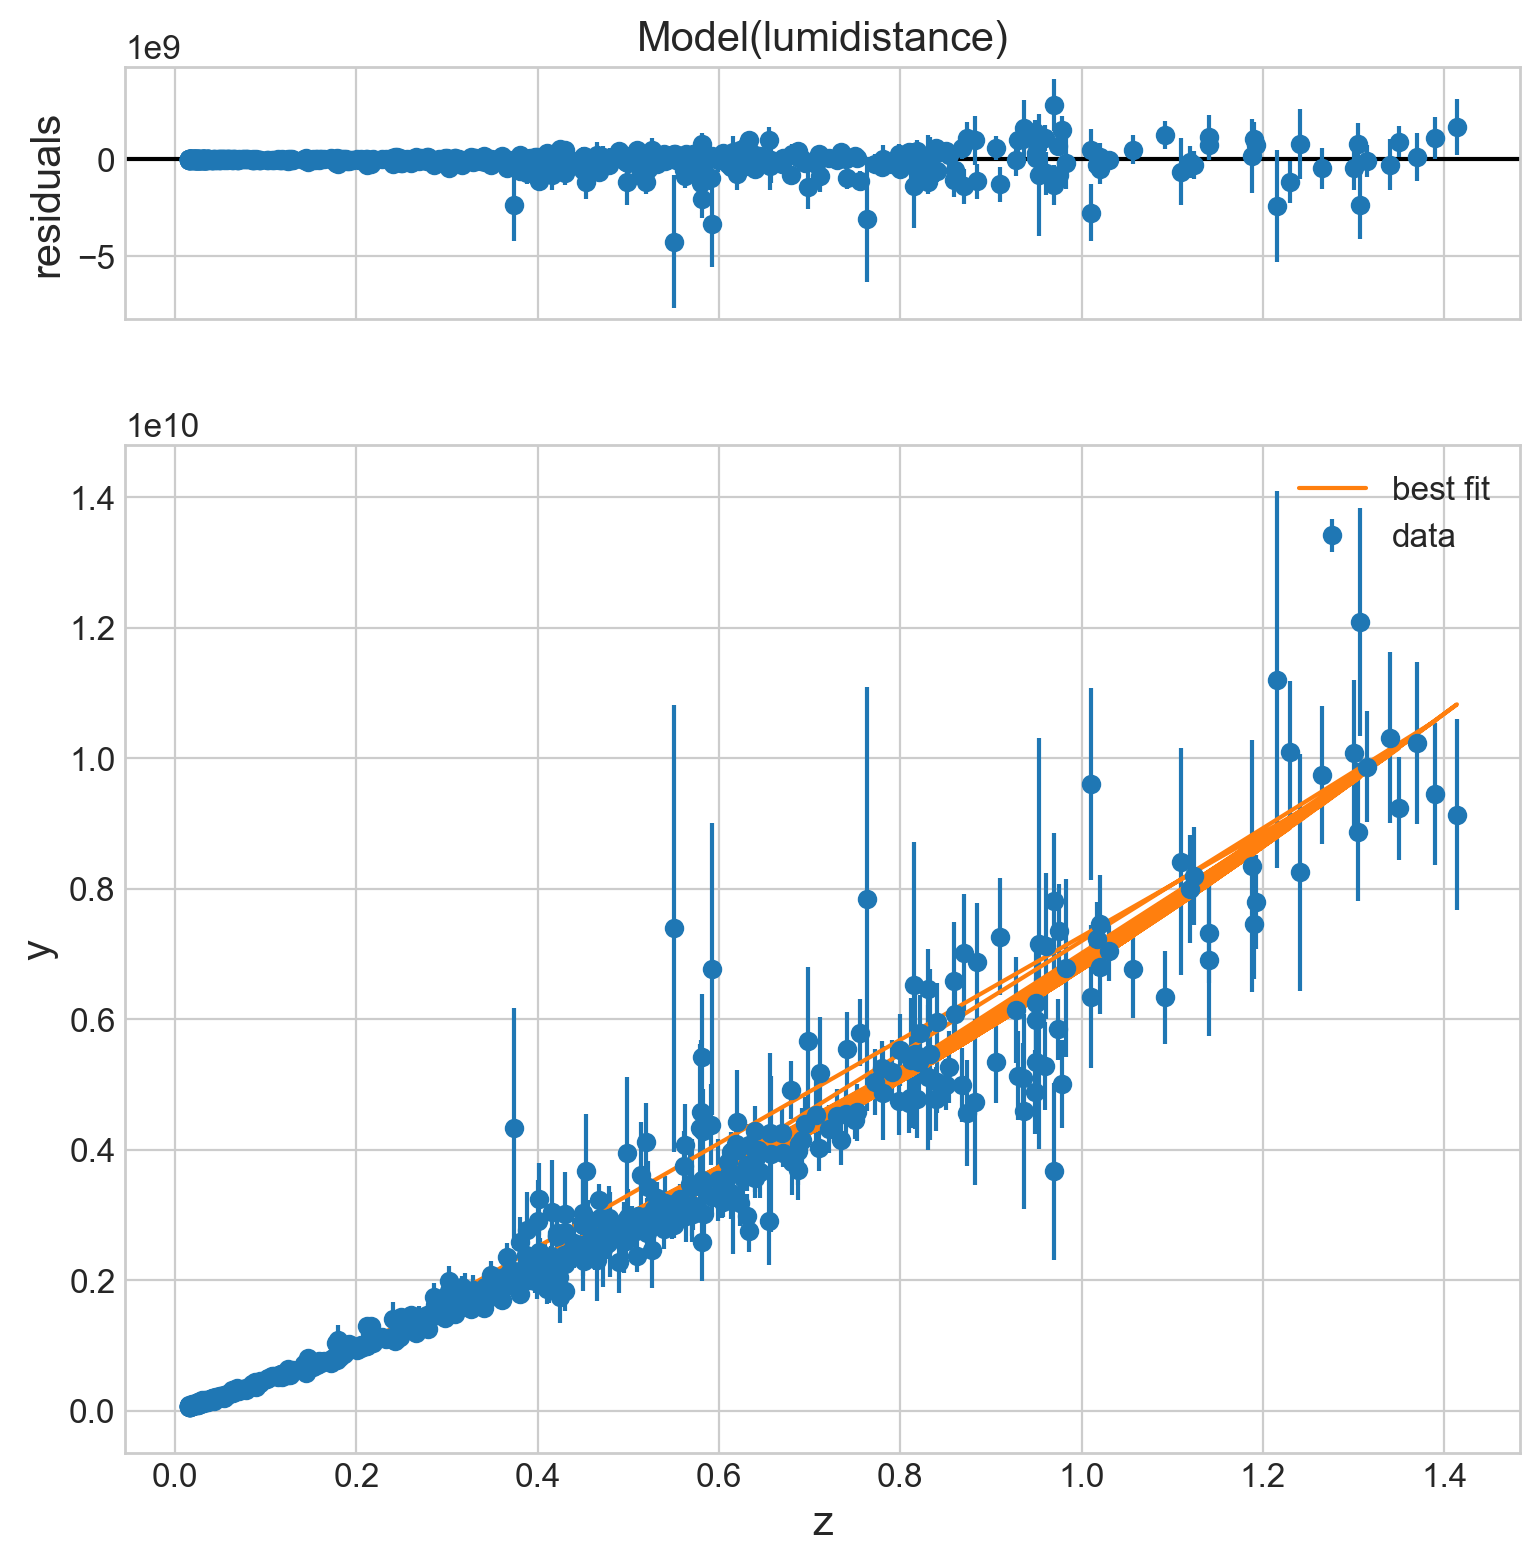

<Figure size 900x600 with 0 Axes>

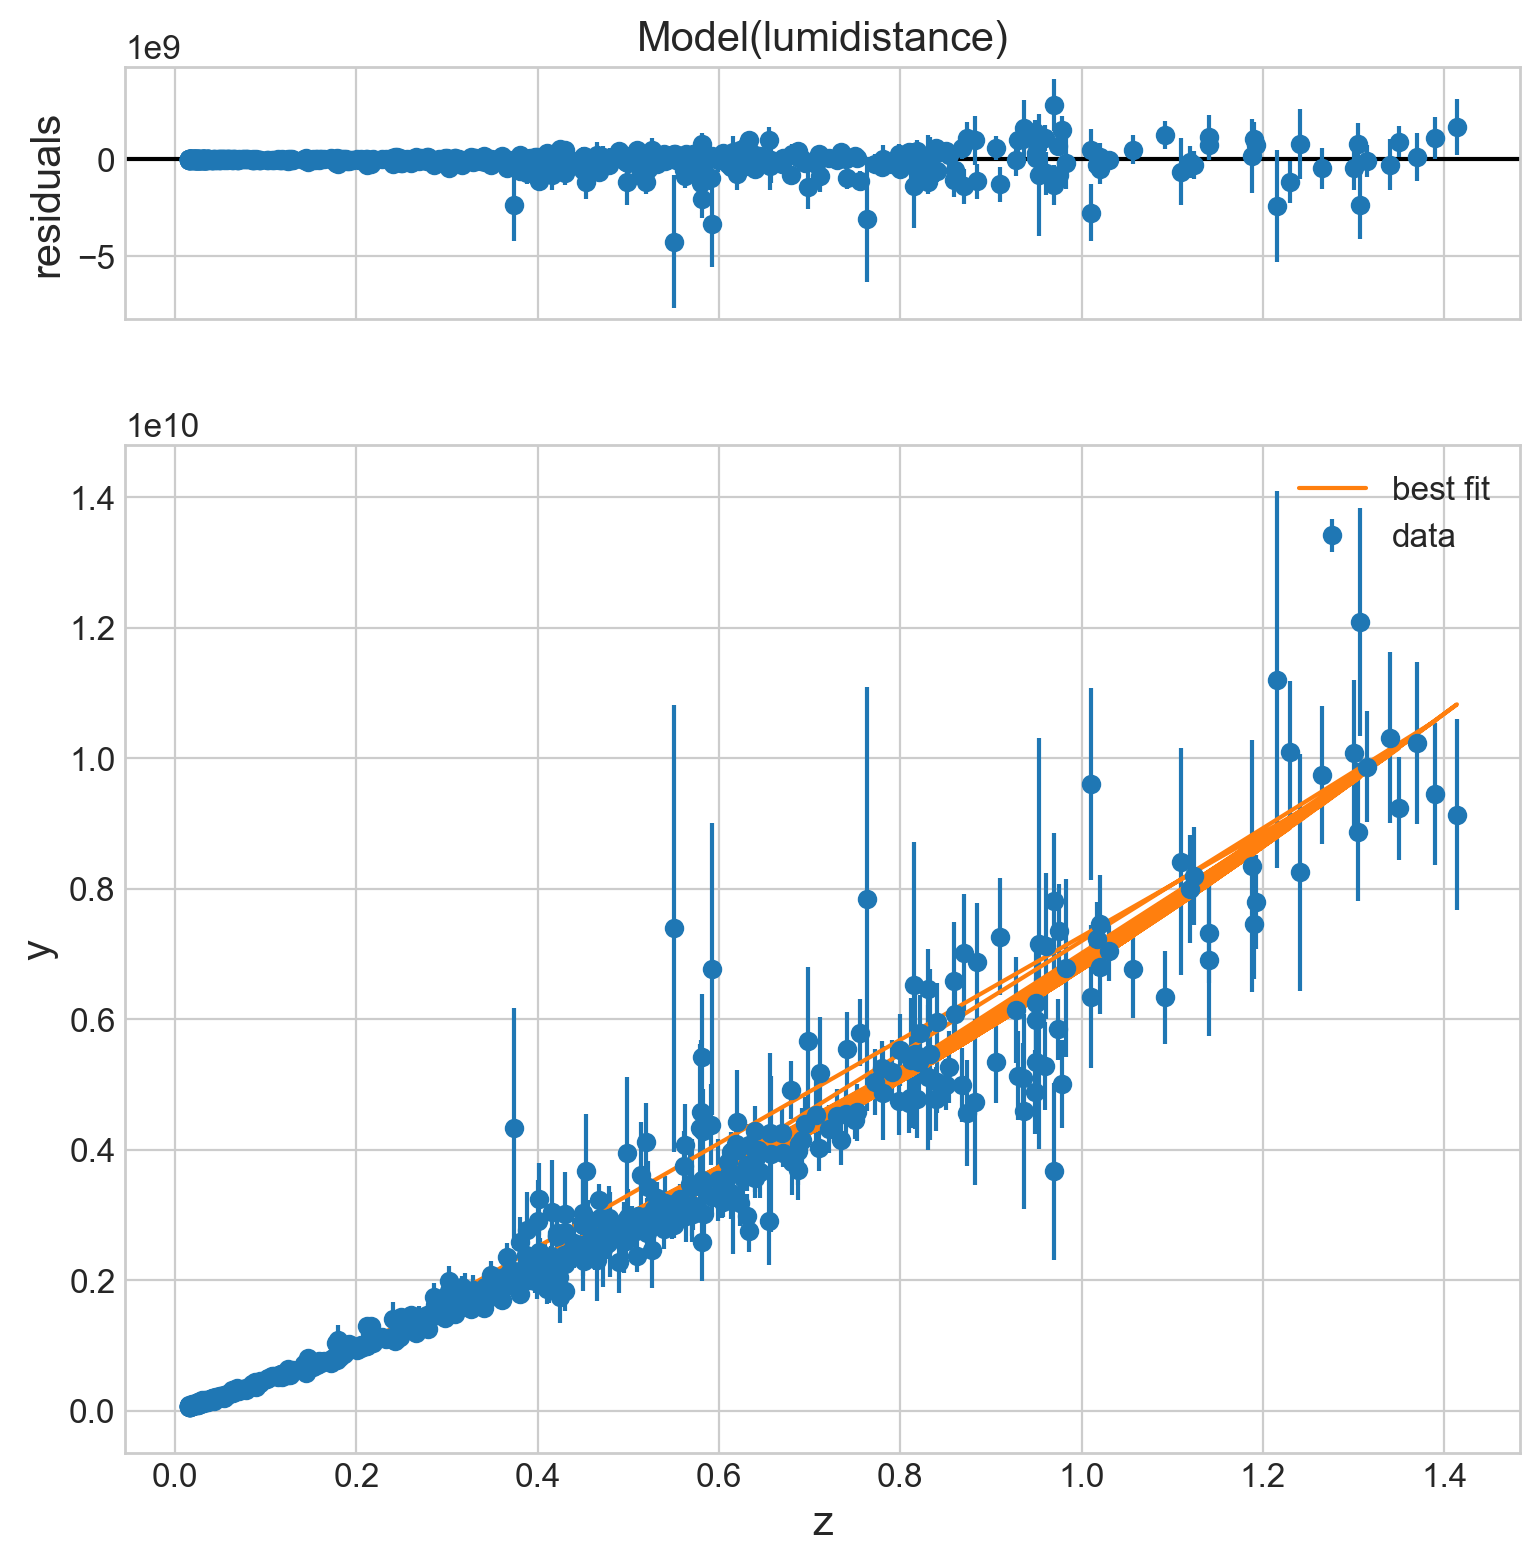

In [37]:
#>>>RUN: L6.8-runcell01

import lmfit

model  = lmfit.Model(lumidistance)
p = model.make_params(h0=70,Om=0.2)
result = model.fit(data=distance, params=p, z=redshift, weights=1./distance_err)
lmfit.report_fit(result)
plt.figure()
result.plot()

Now, since we are experts at fitting, let's go ahead and compute the log likelihood . We are going to minimize the (negative of) loglikelihood with `scipy.optimize` in order to do the fit.

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 913.5417110515142
        x: [ 7.504e+01  1.000e+00]
      nit: 6
      jac: [-2.046e-04 -9.535e+01]
     nfev: 30
     njev: 10
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
residuals mean: -0.03080433448983018
residuals var: 1.5741230085826976
residuals skew: 0.8793618472169266
residuals kurtosis: 8.057735798654969
Total chi2: 913.5417110515143 NDOF 578
Normalized chi2: 1.5805219914386062
Probability of chi2: 0.0


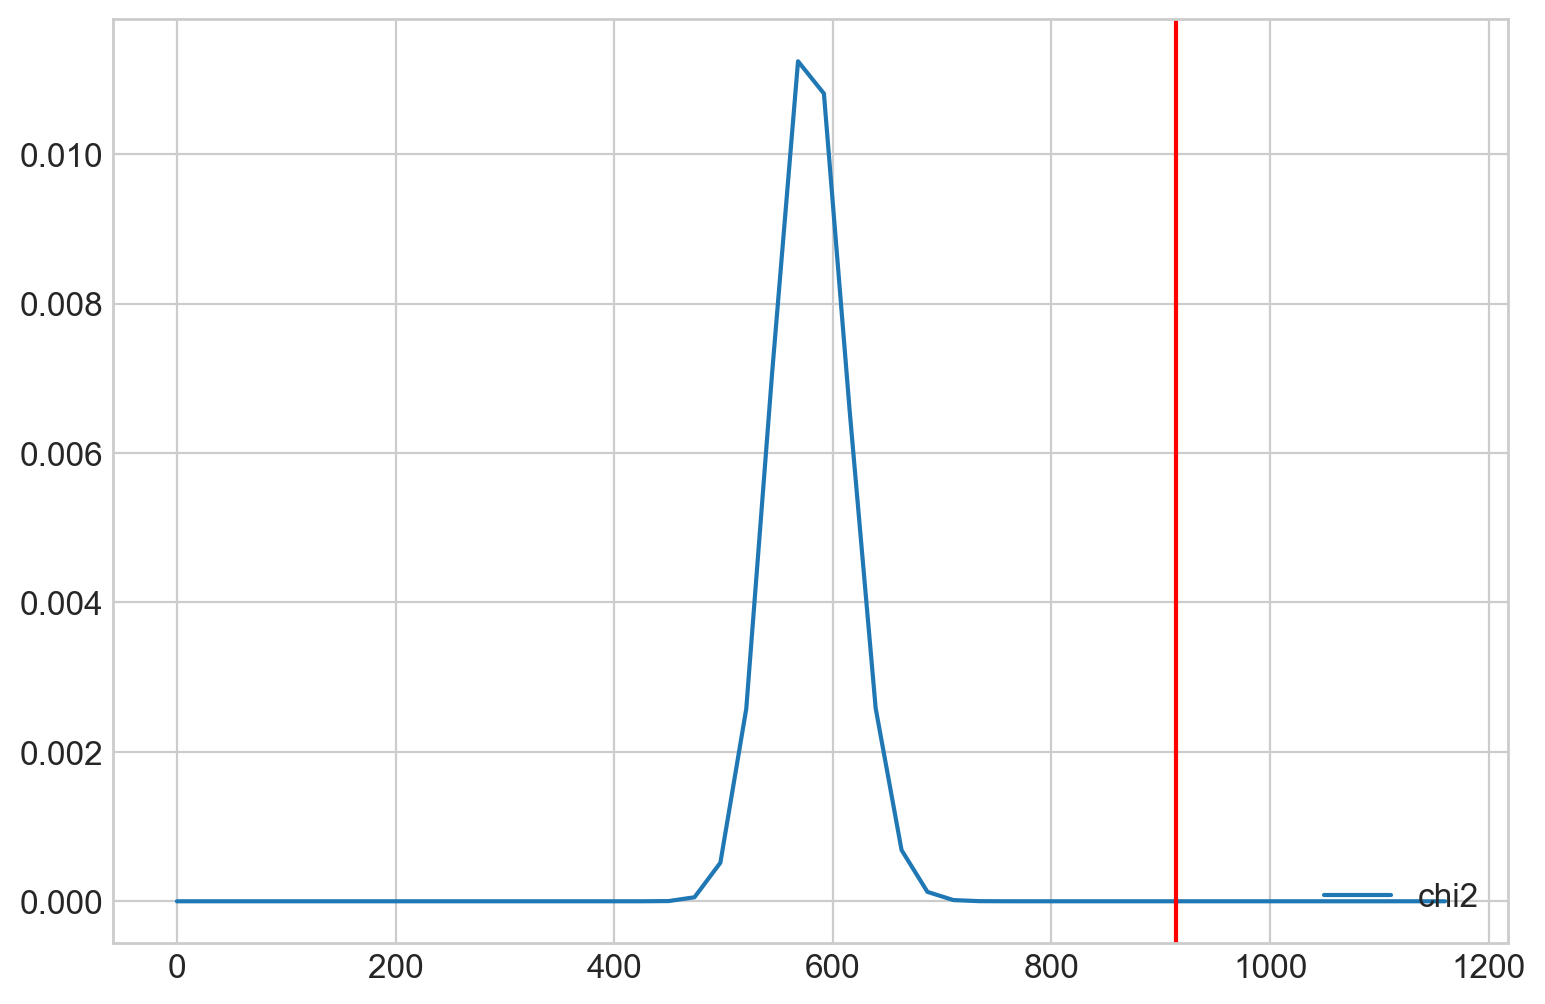

In [39]:
#>>>RUN: L6.8-runcell02
from scipy import optimize as opt 

def chi2(x):
    lTot=0
    for i0 in range(len(redshift)):
        xtest=lumidistance(redshift[i0],x[0],x[1])
        #lTot = lTot+(distance[i0]-xtest)**2
        lTot = lTot+((1./distance_err[i0])**2)*(distance[i0]-xtest)**2
    return lTot #*0.5 The above is 2 times loglike

def residuals(x):
    residuals=np.array([])
    for i0 in range(len(redshift)):
        pResid=lumidistance(redshift[i0],sol.x[0],sol.x[1])-distance[i0]
        residuals = np.append(residuals,pResid/distance_err[i0])
    return residuals


x0 = np.array([60.,0.2])
ps = [x0]
bnds = ((0, 1000), (0, 1.0))
sol=opt.minimize(chi2, x0,bounds=bnds, tol=1e-6)
print(sol)
residuals=residuals(sol.x)
print_moments(residuals,"residuals")
chi2=np.sum(residuals**2)
print("Total chi2:",chi2,"NDOF",len(residuals)-2)
print("Normalized chi2:",chi2/(len(residuals)-2))
print("Probability of chi2:",1-stats.chi2.cdf(chi2,(len(residuals)-2)))

#Let's plot it for good measure too
x = np.linspace(0,len(residuals)*2)
chi2d=stats.chi2.pdf(x,len(residuals-2)) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2, c='red')
plt.legend(loc='lower right')
plt.show();

What can we say about this fit, is there something off?

Let's plot the residuals and the fit function and also scan the likelihood for our parameter uncertainties. There is one thing off, can you figure it out?


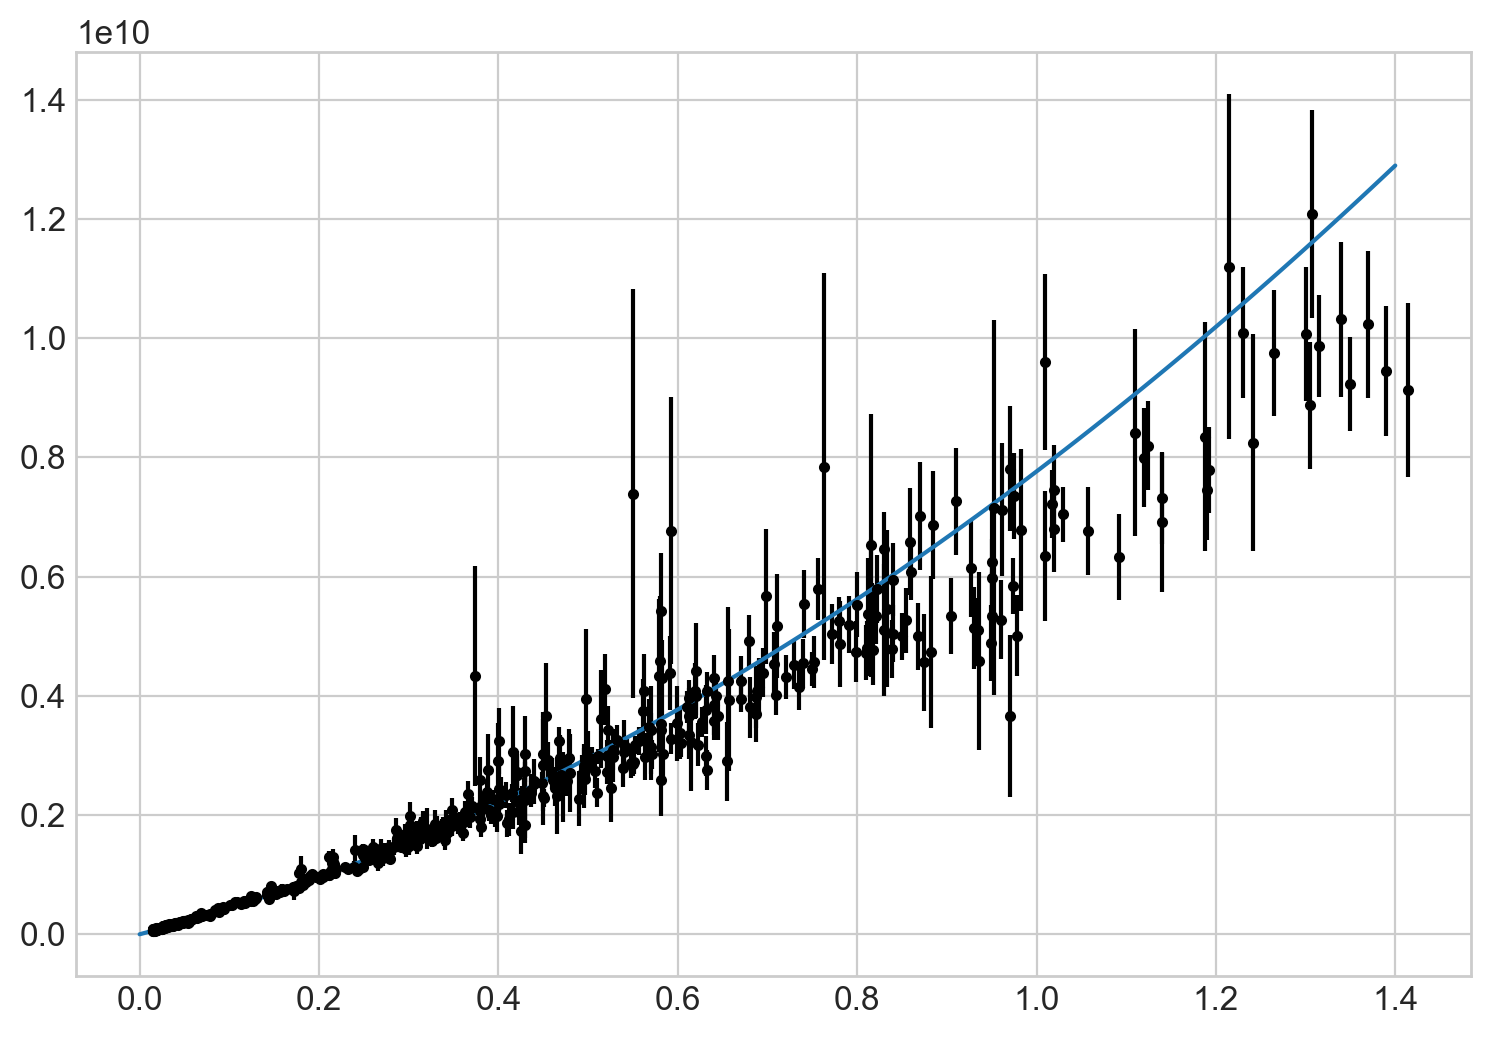

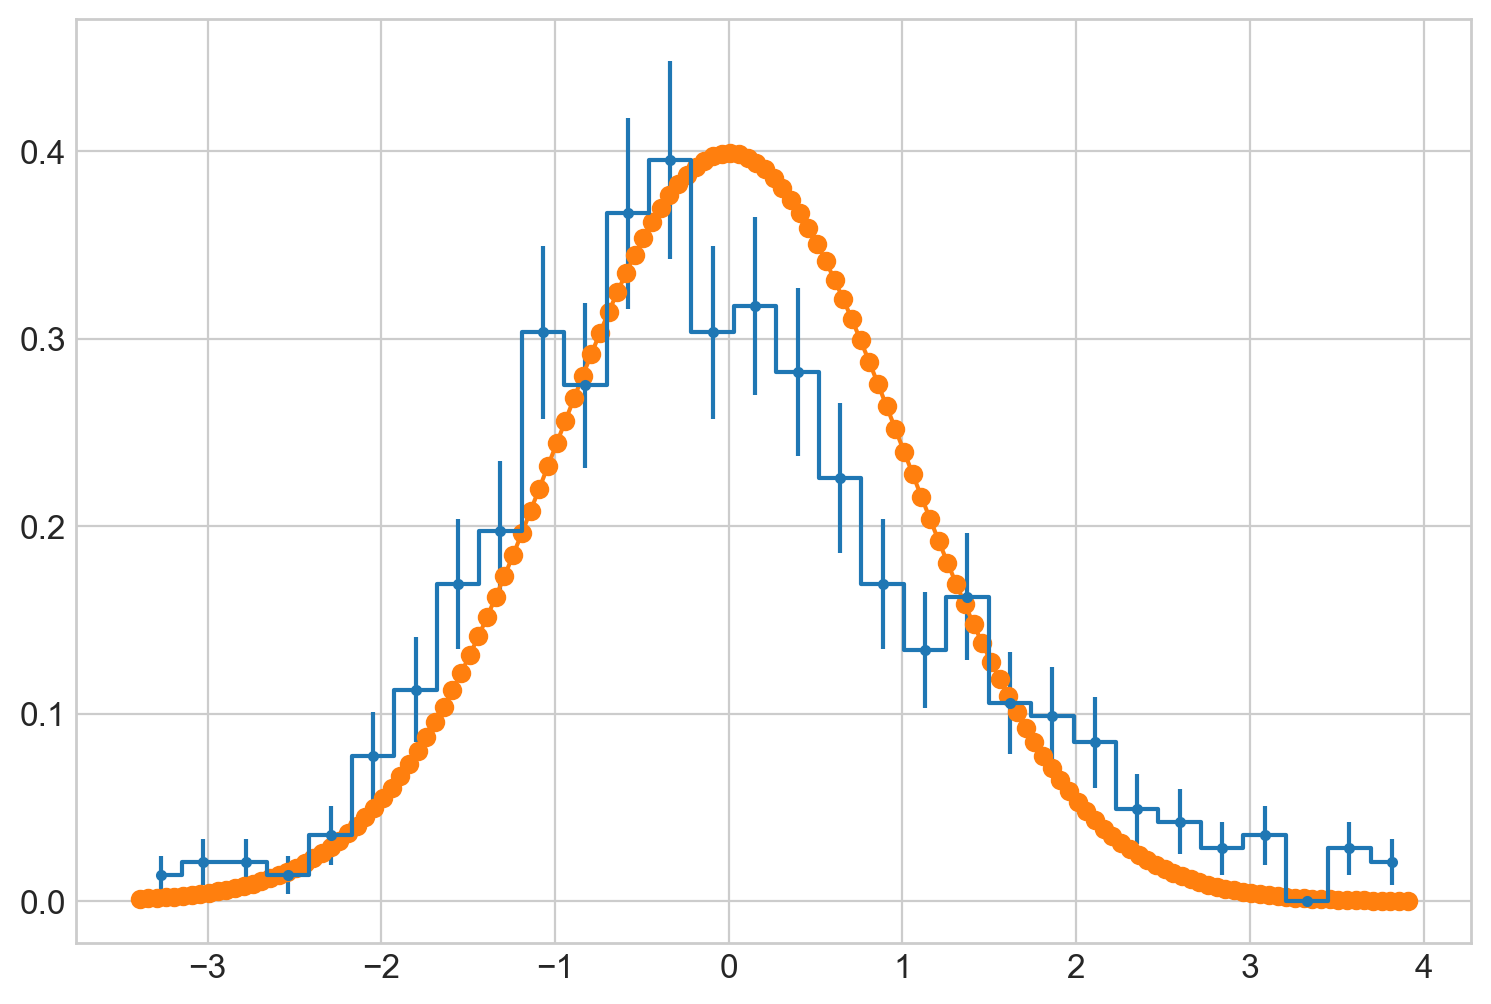

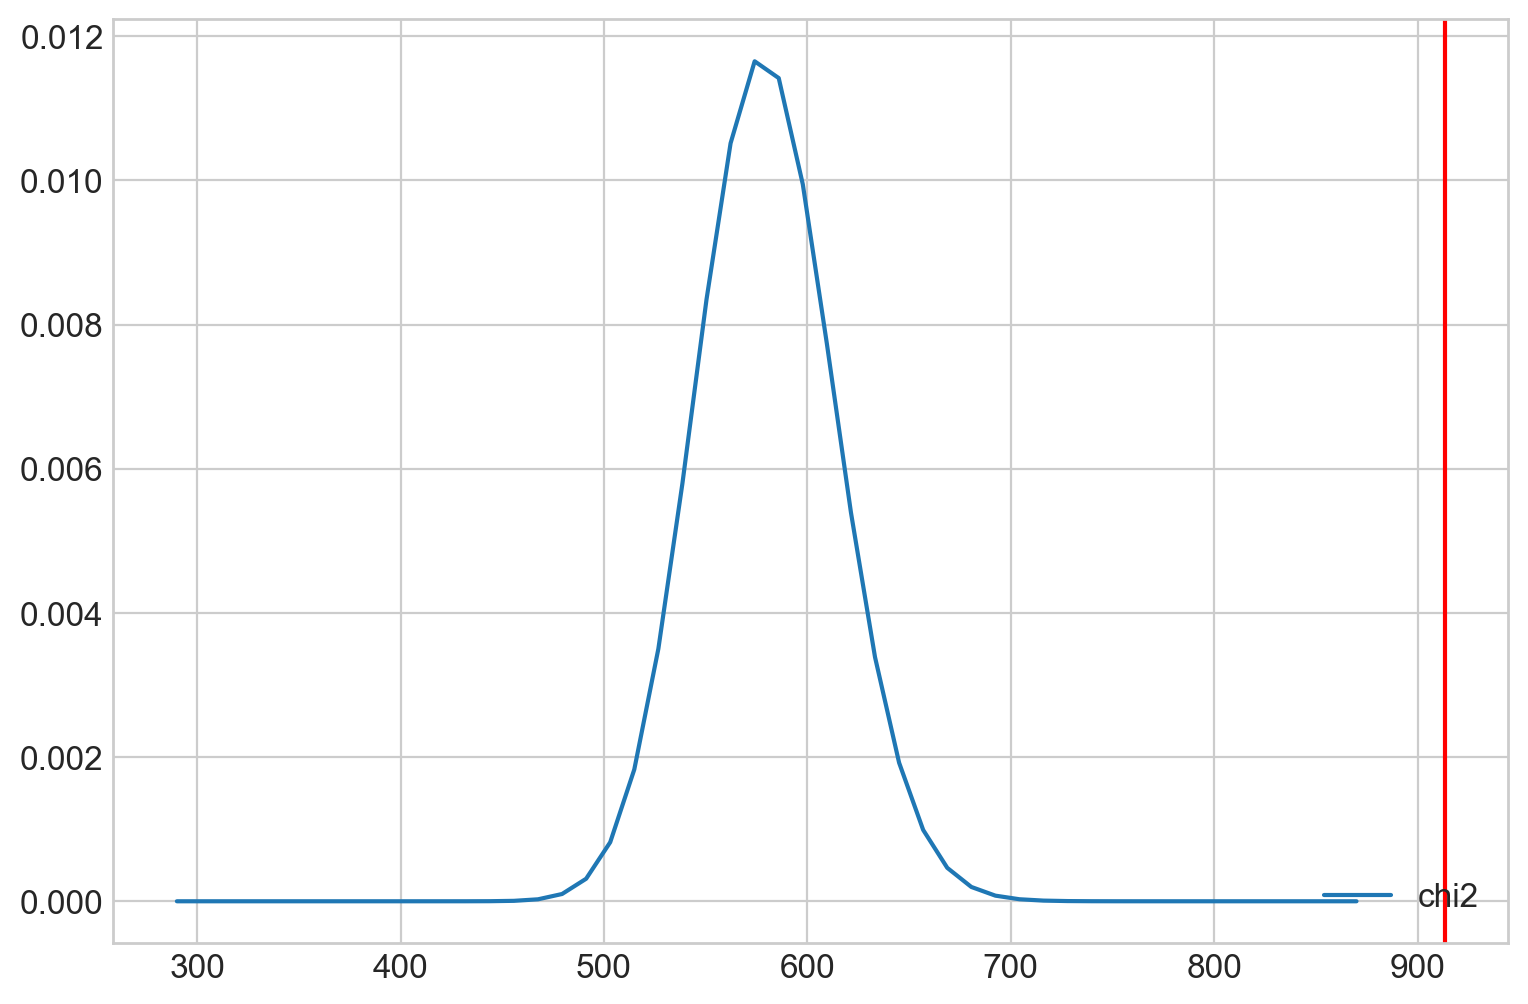

In [40]:
#>>>RUN: L6.8-runcell03

#Plot it against the data
xvals = np.linspace(0,1.4,100)
yvals = []
for pX in xvals:
    yvals.append(lumidistance(pX,sol.x[0],sol.x[1]))

plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.plot(xvals,yvals)
plt.show()

#Histogram the residuals
y0, bin_edges = np.histogram(residuals, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
k=np.arange(bin_edges[0],bin_edges[-1],0.05)
normal=stats.norm.pdf(k,0,1)
plt.plot(k,normal,'o-')
plt.show()

x = np.linspace(len(residuals)*0.5,len(residuals)*1.5)
chi2d=stats.chi2.pdf(x,len(residuals-2)) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2, c='red')
plt.legend(loc='lower right')
plt.show()




<a name='exercises_6_8'></a>   

| [Top](#section_6_0) | [Restart Section](#section_6_8) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-6.7.1</span>

So given the Friedmann equations, we can add back the curvature term:

$$ d(z) = ct^{\prime} = (1+z)ct = (1+z)\frac{c}{h_{0}}\int_{0}^{z} \frac{dz^{\prime}}{\sqrt{\Omega_{M}\left(1+z^{\prime}\right)^{3} + \Omega_{\kappa}\left(1+z^{\prime}\right)^{2}+ 1-\Omega_{M}-\Omega_{\kappa}}}$$

Adjust the `lumidistance()` function to fit for curvature. What is the value of $\Omega_{\kappa}$ if we perform a new fit to the data? What do you think this this is implying? 

Enter your answer as a number with precision 1e-2.


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def hubble_curve(z,Om,OmK):
    return #YOUR CODE HERE

def lumidistance_curve(z,h0,Om,OmK):
    return #YOUR CODE HERE


model  = lmfit.Model(lumidistance_curve)
p = model.make_params(h0=70,Om=0.2,OmK=0.0)
result = model.fit(data=distance, params=p, z=redshift, weights=1./distance_err)
lmfit.report_fit(result)
result.plot();


In [ ]:
#>>>SOLUTION
def hubble_curve(z,Om,OmK):
    pVal=Om*(1+z)**3+OmK*(1+z)**2+(1.-Om-OmK)
    return np.sqrt(pVal)

def lumidistance_curve(z,h0,Om,OmK):
    integral=0
    nint=100
    for i0 in range(nint):
        zp=z*float(i0)/100.
        dz=z/float(nint)
        pVal=1./(1e-5+hubble_curve(zp,Om,OmK))
        integral += pVal*dz
    d=(1.+z)*integral*(1e6*3e5/h0)
    return d


model  = lmfit.Model(lumidistance_curve)
p = model.make_params(h0=70,Om=0.2,OmK=0.0)
result = model.fit(data=distance, params=p, z=redshift, weights=1./distance_err)
lmfit.report_fit(result)
result.plot();

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
-0.19 +/- 0.40
</pre>
        
**EXPLANATION:**
    
We find the curvature is consistent with 0, with a slight bias towards a negative curvature value. Interestingly, we also find that the Hubble's constant doesn't change as much, but the matter changes some more. However, the overall scale of change is relatively small. Interestingly, the chi2 value is almost exactly the same, implying that adding these parameters does not really change the overall performance. 
    
</div>
